## Import Libraries

In [8]:
# Cell 1: Import Libraries
import pandas as  pd
import os
import shutil
from bs4 import BeautifulSoup
import base64
import httpx
from openai import AzureOpenAI
from openai import OpenAI
import openai
from PIL import Image
import svglib
from io import BytesIO
from wand.image import Image
from dotenv import load_dotenv

from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import os
from azure.storage.blob import BlobServiceClient, generate_blob_sas, BlobSasPermissions , ResourceTypes
from datetime import datetime, timedelta

## Read HTML spec Document

In [2]:
# Read HTML Document
# Specify the path to the local HTML file
html_file_path = r"C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\Chip-Level TAP IP HAS.html"
with open(html_file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

## Create a BeautifulSoup object and specify the parser 

In [3]:
soup = BeautifulSoup(html_content, 'html.parser')

## Extract all tables and appending text in origional file

In [4]:
 # Extract all tables  
tables = soup.find_all('table')
# print("Tables found on the webpage:\n")
for i, table in enumerate(tables):
    # print(f"Table {i+1}:\n")
    df = pd.read_html(str(table))
    table_text = df[0].to_string(index=False)
    # print(table_text, "\n")
    
    # Create a new tag for the text format of the table
    new_tag = soup.new_tag("pre")
    new_tag.string = table_text
    
    # Replace the original table with the text format
    table.replace_with(new_tag)
# Update the html_content with modified soup content
html_content = str(soup)

C:\Users\satyaprx\AppData\Local\Temp\ipykernel_7532\2944560093.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))
C:\Users\satyaprx\AppData\Local\Temp\ipykernel_7532\2944560093.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))
C:\Users\satyaprx\AppData\Local\Temp\ipykernel_7532\2944560093.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))
C:\Users\satyaprx\AppData\Local\Temp\ipykernel_7532\2944560093.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a 

## Extract all Images

In [5]:
# Extract all images  
images = soup.find_all('img')  

# Directory to save images  
image_dir = "C:\\Users\\satyaprx\\Desktop\\INTEL_TESTPLAN2\\Extracted_images" 
os.makedirs(image_dir, exist_ok=True)  
  
# Print image sources and save images  
print("Images found on the webpage:\n")  
for img in images:  
    img_src = img.get('src')
    print(img_src)
    if img_src and img_src.lower().endswith('.png') or img_src.lower().endswith('.svg') or img_src.lower().endswith('.jpg') or img_src.lower().endswith('.jpeg'):  
        # Construct the absolute path for local images  
        absolute_path = os.path.join(os.path.dirname(html_file_path), img_src)  
        print(f"Image source: {absolute_path}")  
  
        # Only proceed if the image file exists  
        if os.path.exists(absolute_path):  
            img_name = os.path.basename(img_src)[6:]  
            img_path = os.path.join(image_dir, img_name)  
            
  
            # Copy the image file to the destination directory  
            shutil.copy(absolute_path, img_path)  
            print(f"Image saved: {img_path}")  
        else:  
            print(f"Image file does not exist: {absolute_path}")  



files = os.listdir("C:\\Users\\satyaprx\\Desktop\\INTEL_TESTPLAN2\\Model_final_pipeline_images")
image_paths = []
for image in files:
    image_paths.append(os.path.join("C:\\Users\\satyaprx\\Desktop\\INTEL_TESTPLAN2\\Model_final_pipeline_images", image))

Images found on the webpage:

./Chip-Level TAP IP HAS_files/example_of_a_tap_network.vsdx_Page-1_43bdb.svg
Image source: C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/example_of_a_tap_network.vsdx_Page-1_43bdb.svg
Image saved: C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\Extracted_images\e_of_a_tap_network.vsdx_Page-1_43bdb.svg
./Chip-Level TAP IP HAS_files/cltap_ip.vsdx_Page-1_9ead6.svg
Image source: C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/cltap_ip.vsdx_Page-1_9ead6.svg
Image saved: C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\Extracted_images\ip.vsdx_Page-1_9ead6.svg
./Chip-Level TAP IP HAS_files/cltap_fsm.vsd_-1_691d3.svg
Image source: C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/cltap_fsm.vsd_-1_691d3.svg
Image saved: C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\Extracted_images\fsm.vsd_-1_691d3.svg
./Chip-Level TAP IP HAS_files/integration_one_level_tap_network.vsdx_Page-1_b2e5e.svg
Image source: C:\Users\

## convert SVG images to PNG format

In [6]:
# Convert SVG to PNG
def svg_to_png(svg_image, png_path):
    with Image(filename=svg_image) as img:
        img.format = 'png'
        print(png_path)
        img.save(filename=png_path)

image_paths = []
for img in images:
    img_src = img.get('src')
    absolute_path = os.path.join(os.path.dirname(html_file_path), img_src)
    if os.path.exists(absolute_path):
        if img_src.endswith('.svg'):
            png_path = absolute_path.replace('.svg', '.png')
            svg_to_png(absolute_path, png_path)
            image_paths.append(png_path)
        else:
            image_paths.append(absolute_path)
 

C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/example_of_a_tap_network.vsdx_Page-1_43bdb.png
C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/cltap_ip.vsdx_Page-1_9ead6.png
C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/cltap_fsm.vsd_-1_691d3.png
C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/integration_one_level_tap_network.vsdx_Page-1_b2e5e.png
C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/extesttoggle_train_d6init.vsdx_Toggling_c97aa.png
C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/extesttoggle_train_d6init.vsdx_d6init_fixed_c97aa.png
C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/f1.BSCAN_timing_diagram.d5b2cc.png
C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/f2.BSCAN_extest_train_timing_diagram.d5b2cc.png
C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\./Chip-Level TAP IP HAS_files/f3.B

## Generate summeries from extracted images

In [9]:
# Load the environment variables from .env file
load_dotenv()
deployment_name =os.getenv('DEPLOYMENT_NAME')
endpoint =os.getenv('ENDPOINT')
api_key = os.getenv('API_KEY')
proxy_url = 'http://proxy-us.intel.com:912'  
http_client = httpx.Client(proxy=proxy_url)

In [10]:
client = AzureOpenAI(
    azure_endpoint=endpoint,
    api_key=api_key,
    api_version="2024-02-01",
    http_client=http_client)

In [11]:
prompt = "Generate summary of these extracted images."

def extract_info_from_images(base64_image, prompt):
    
    messages=[
        {
            "role": "user",
            "content": [
            {
                "type": "text",
                "text":prompt
            },
            {
                "type": "image_url",
                "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
                }
            }
            ]
        }
    ]
    # print(messages.content[0])
    response = client.chat.completions.create(
        model='G4',
        messages=messages,
        max_tokens=4000)
    image_info = response.choices[0].message.content
    return image_info

def Summarize_image(image_paths, prompt):
    images_summary = {}
    for image_path in image_paths:
        img_name = os.path.basename(image_path)
        with open(image_path, "rb") as image_file:
            base64_image = base64.b64encode(image_file.read()).decode('utf-8')
            image_info = extract_info_from_images(base64_image, prompt)
            images_summary[img_name] = image_info
    return images_summary

image_summaries = Summarize_image(image_paths, prompt)

## Display all Extracted Images

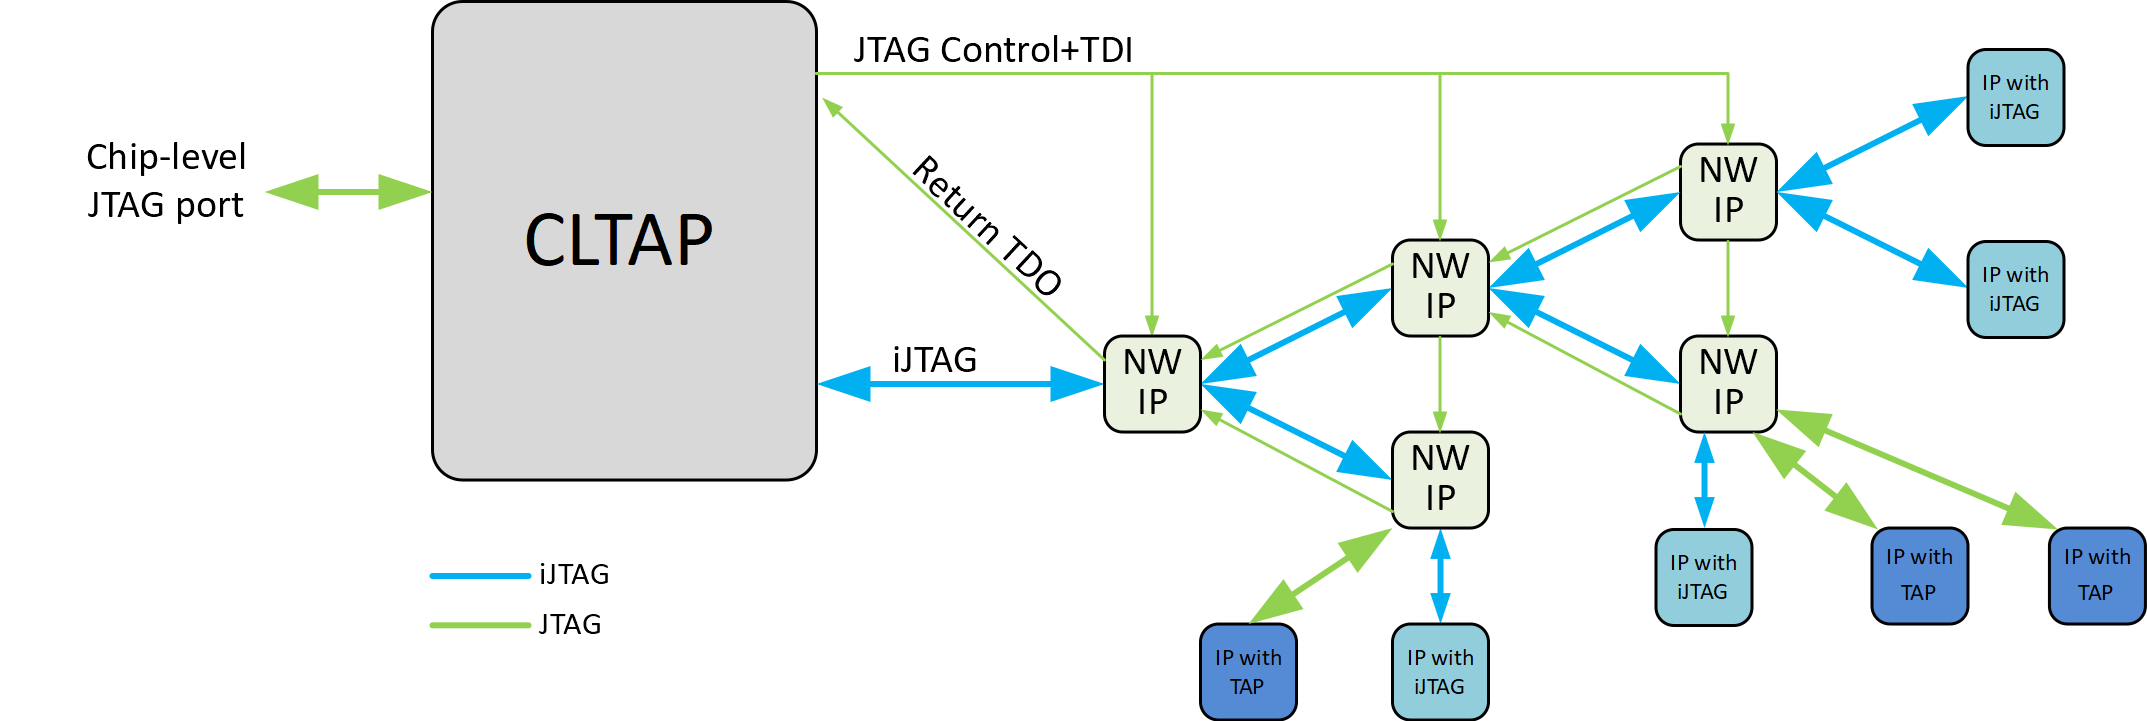

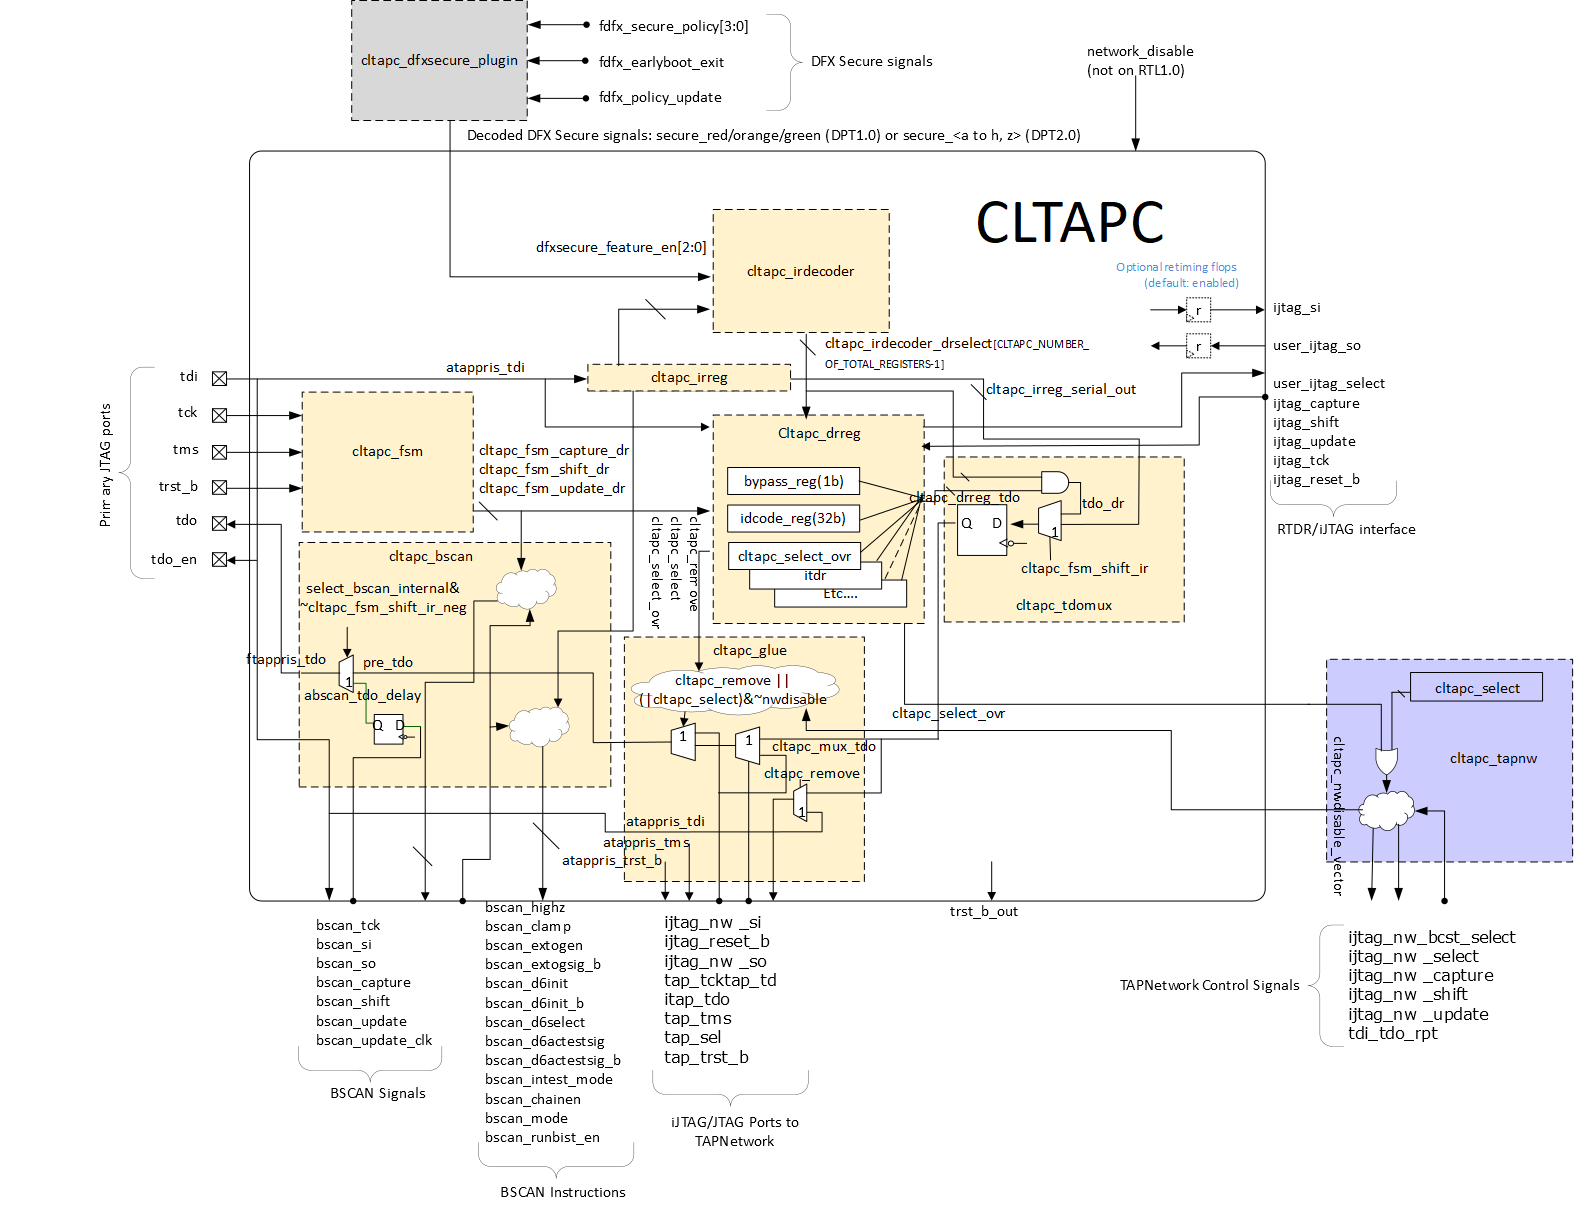

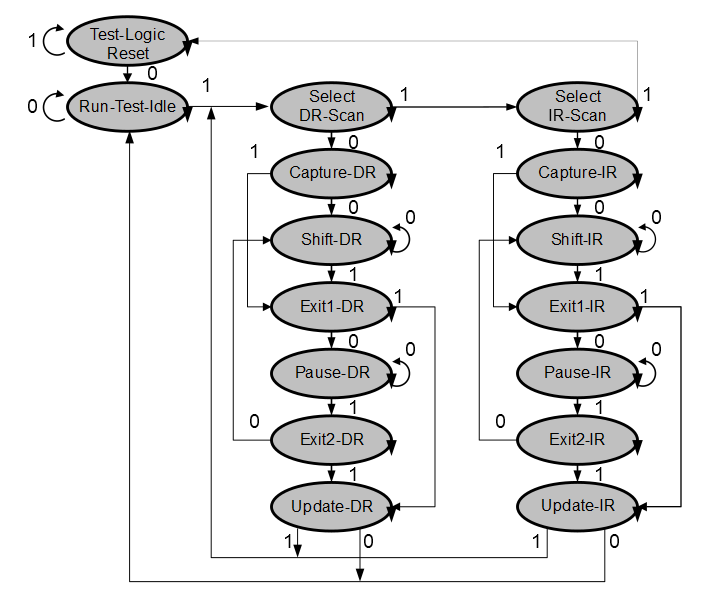

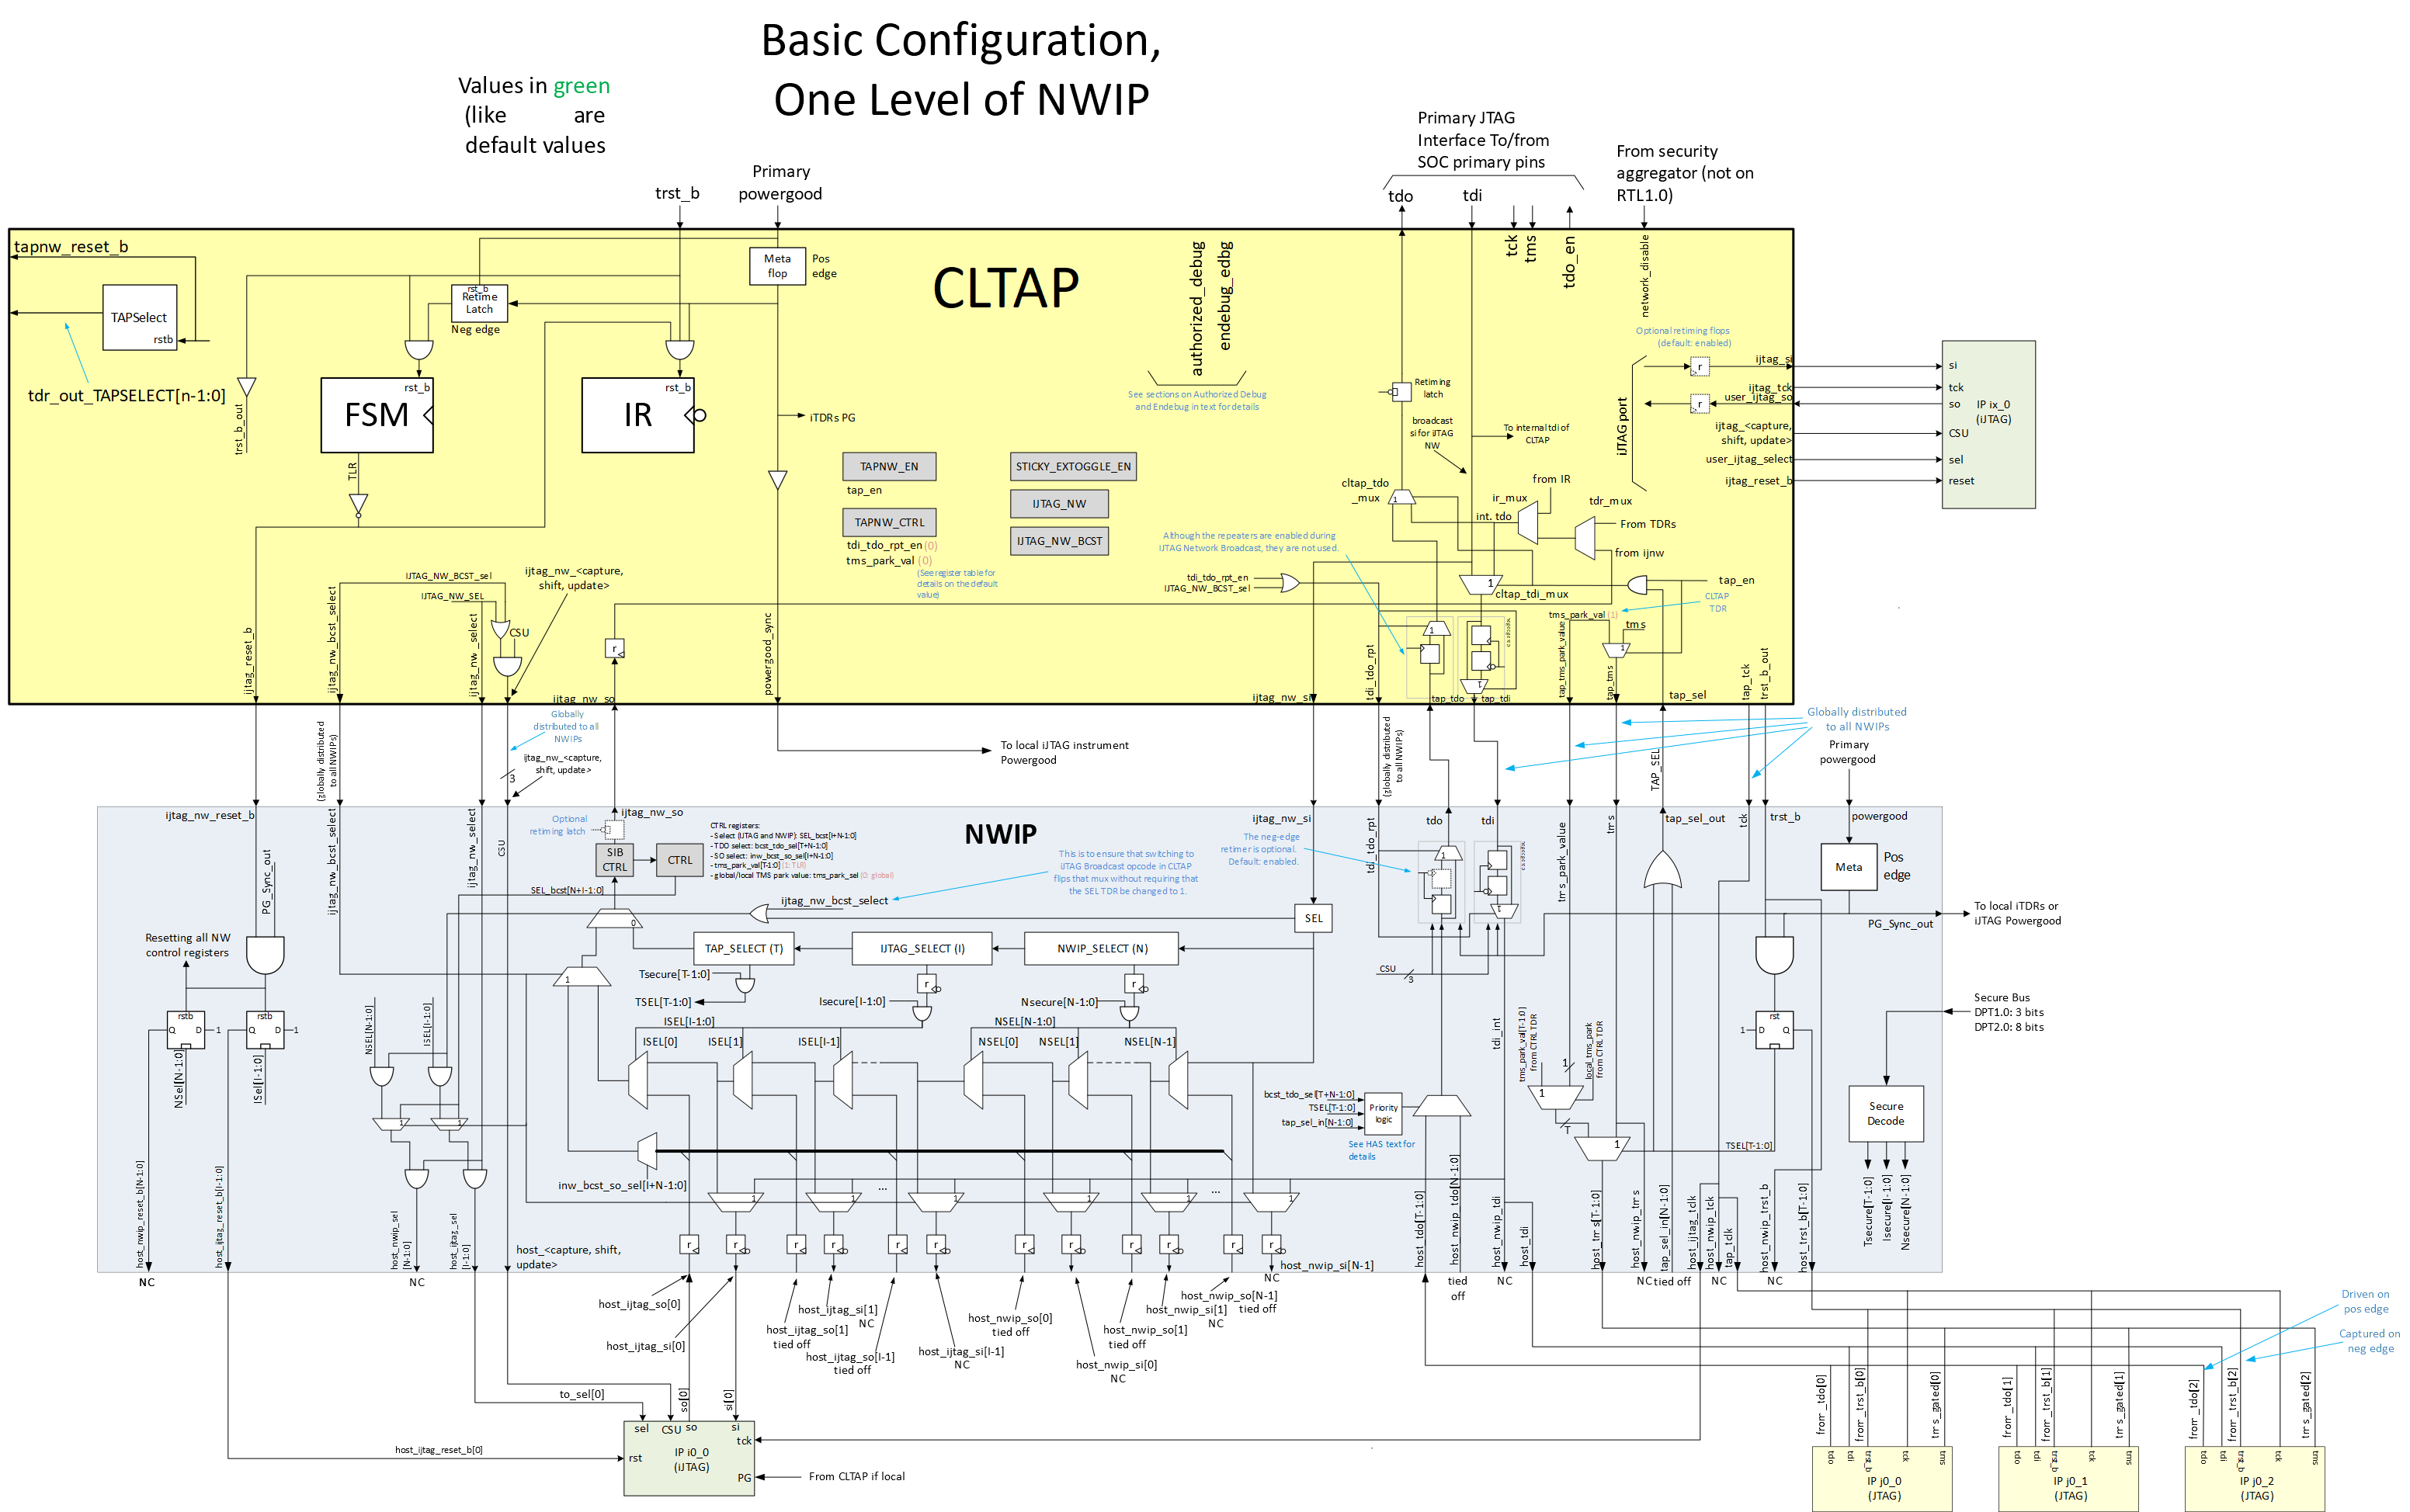

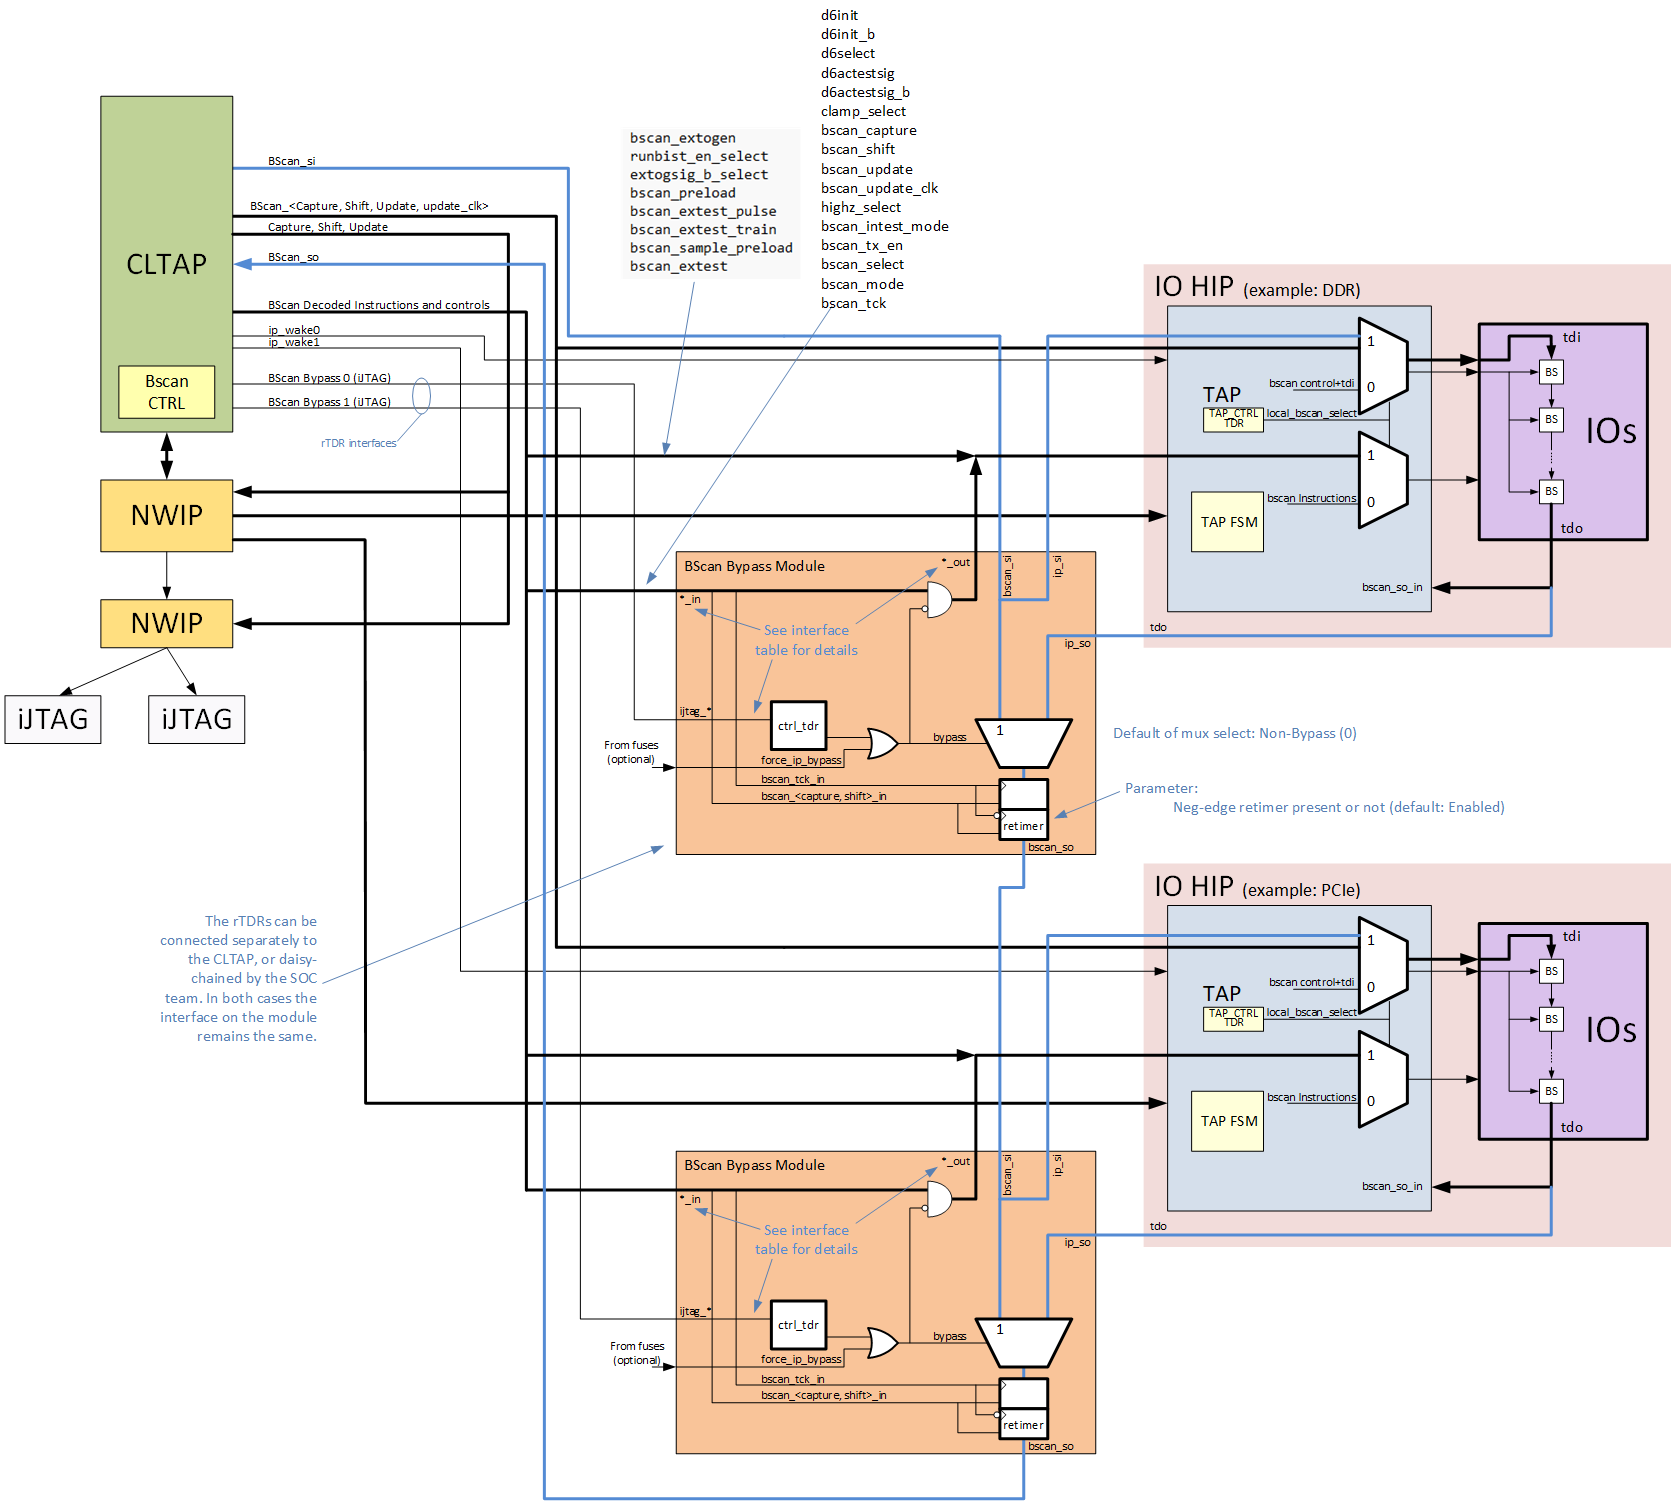

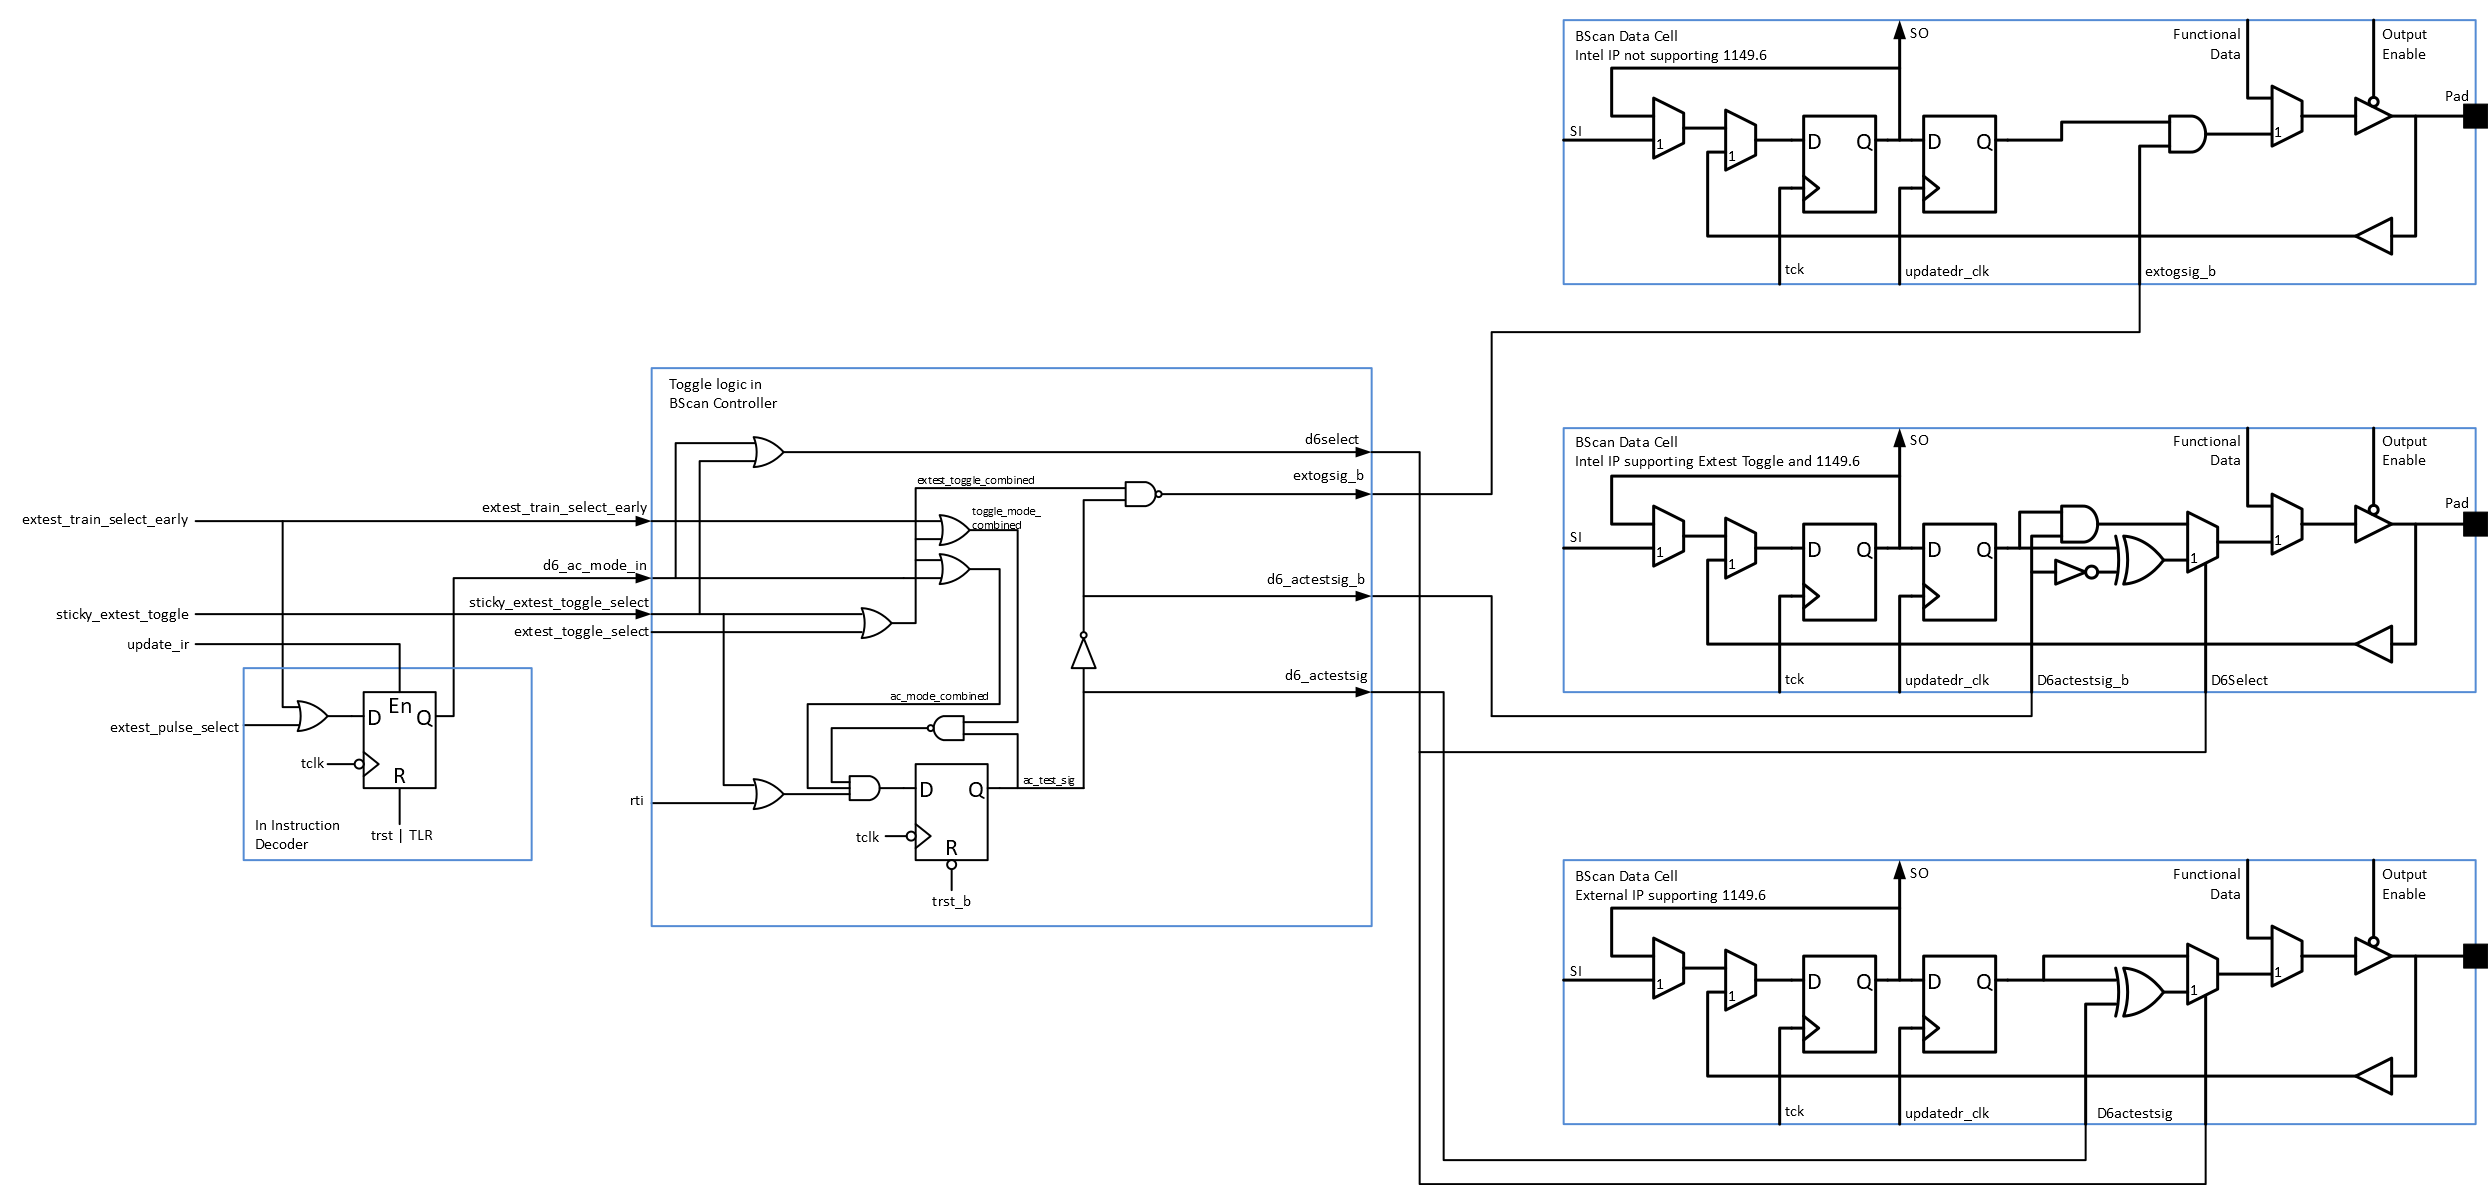

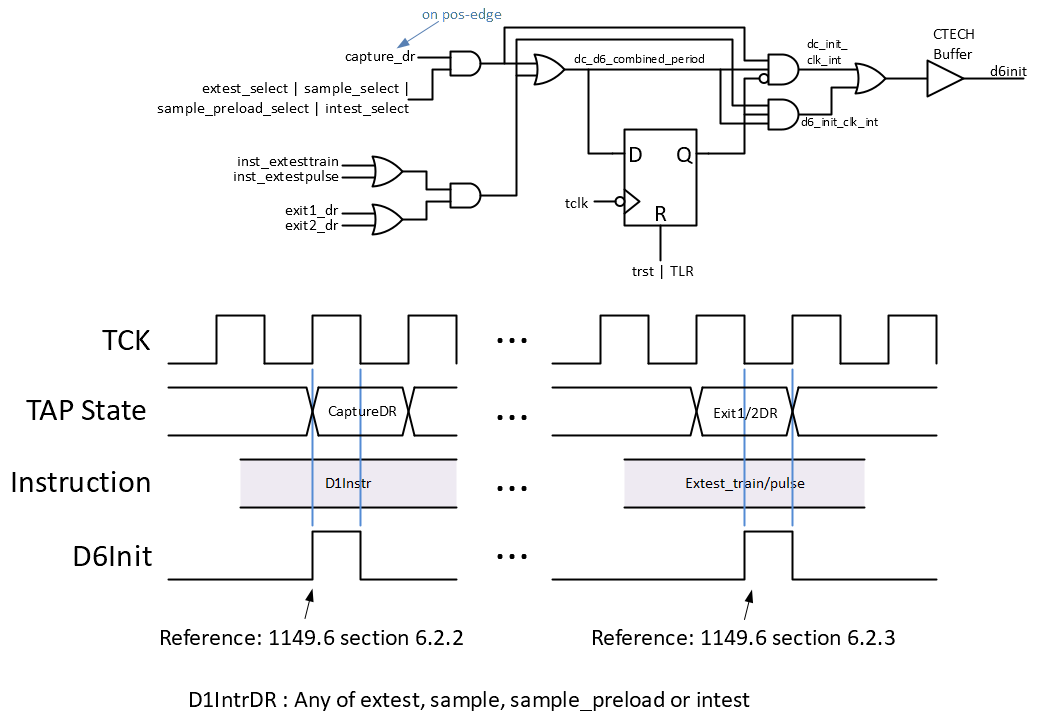

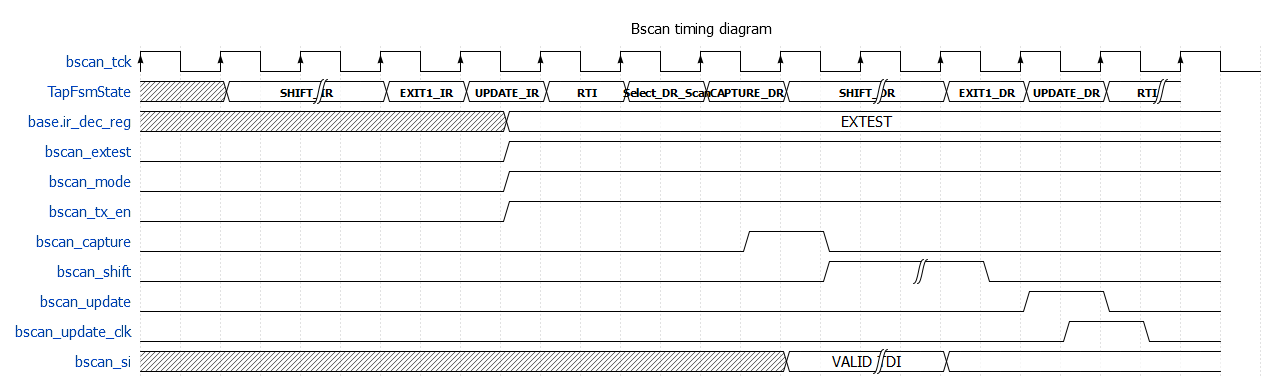

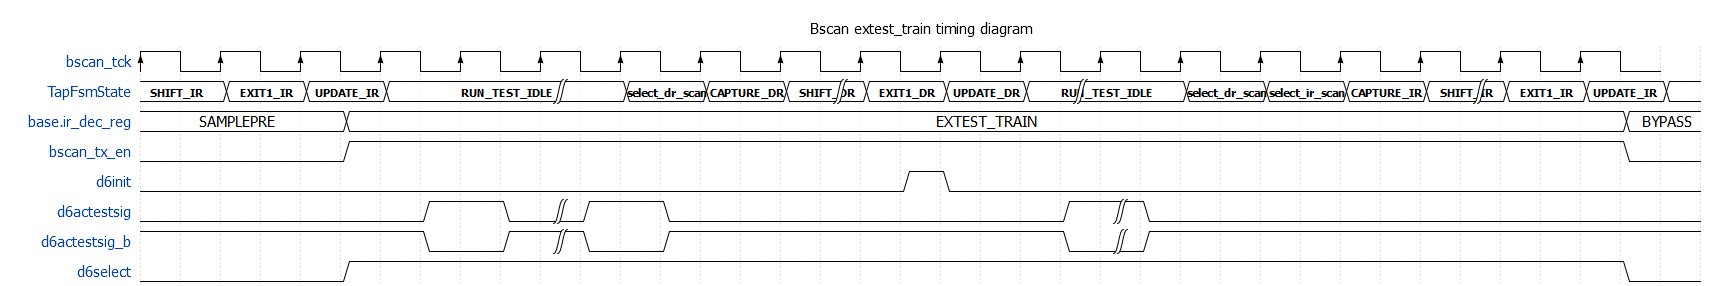

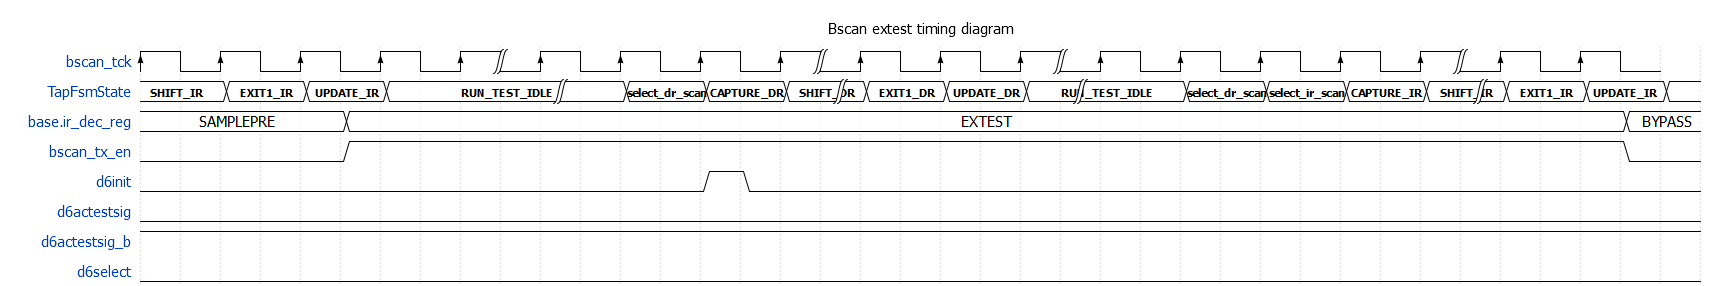

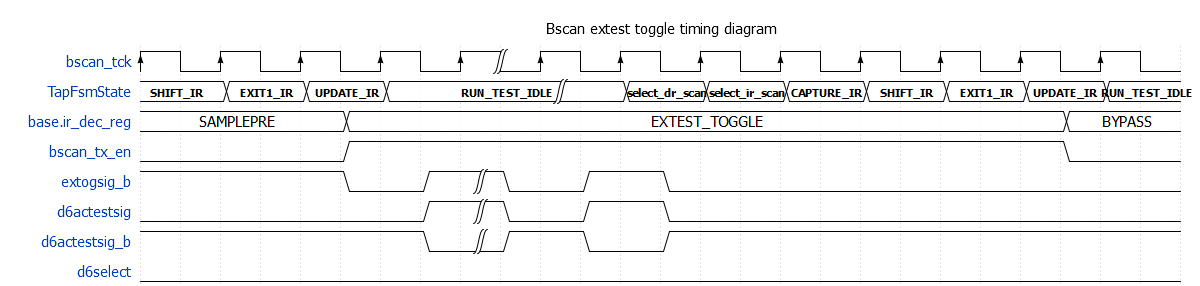

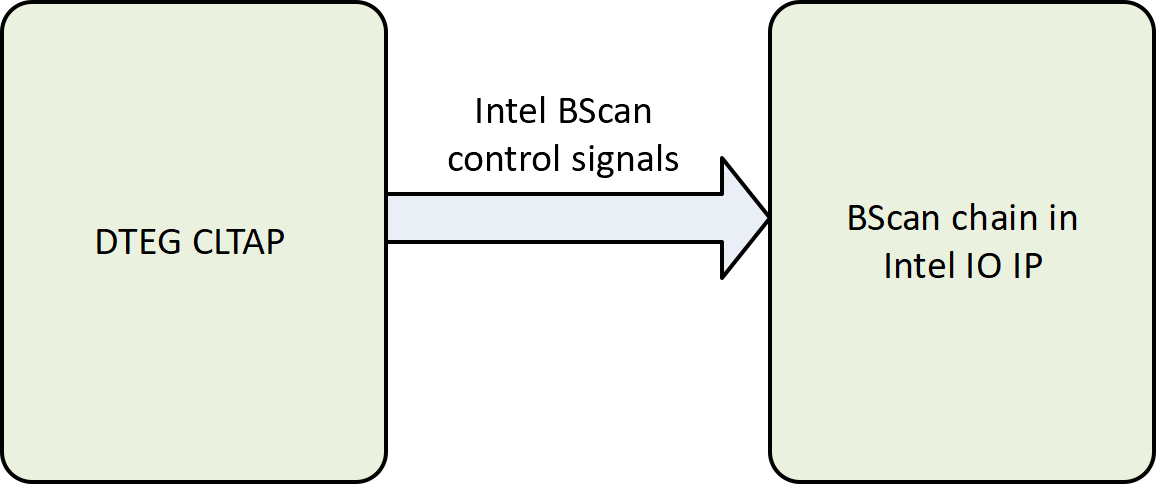

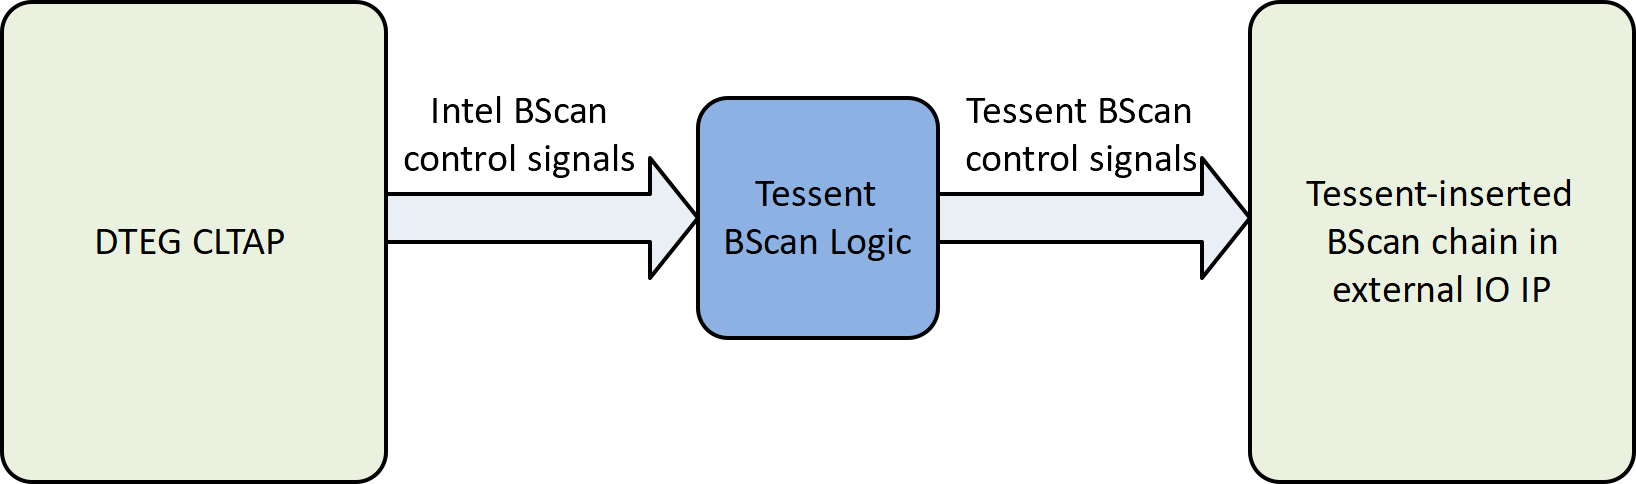

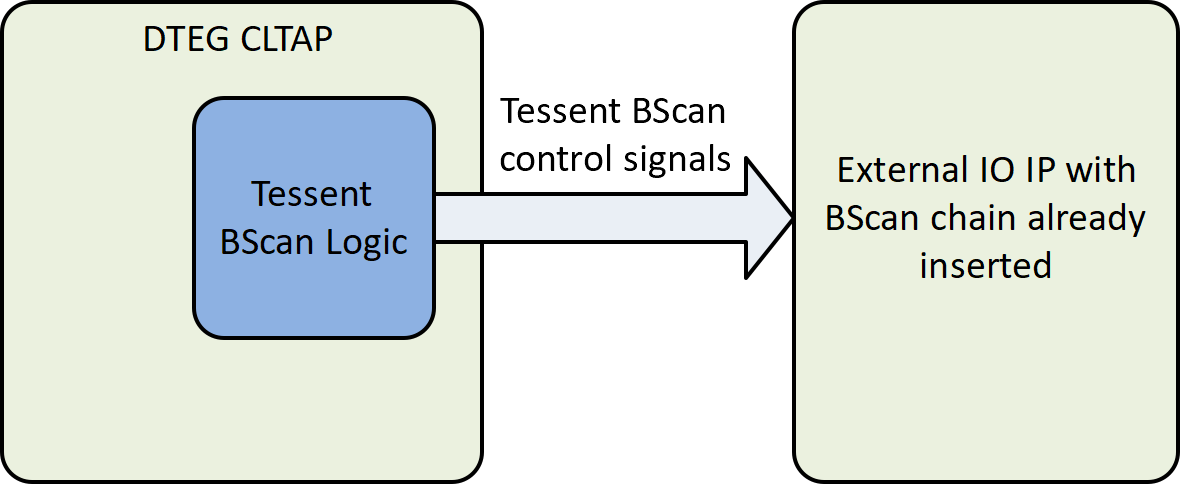

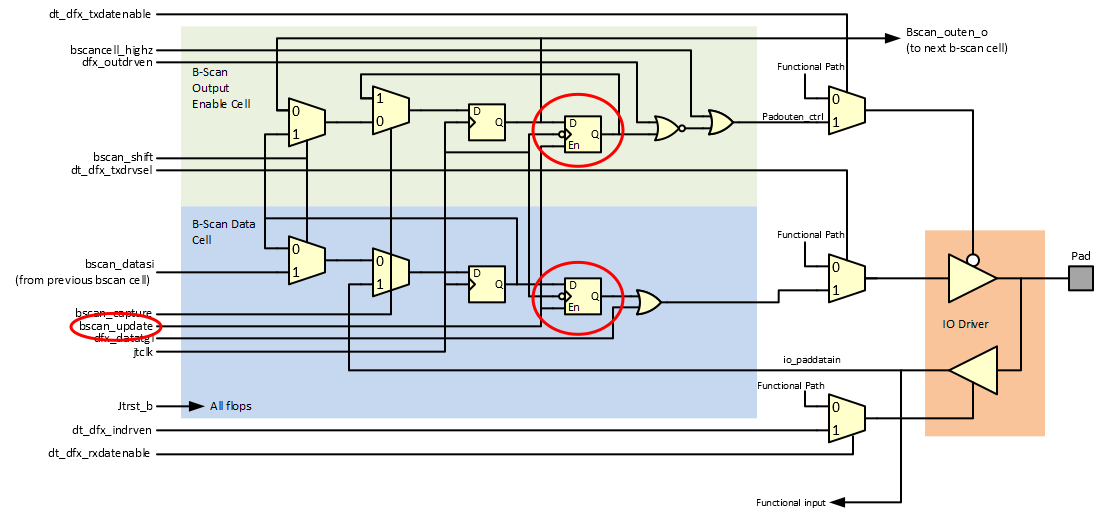

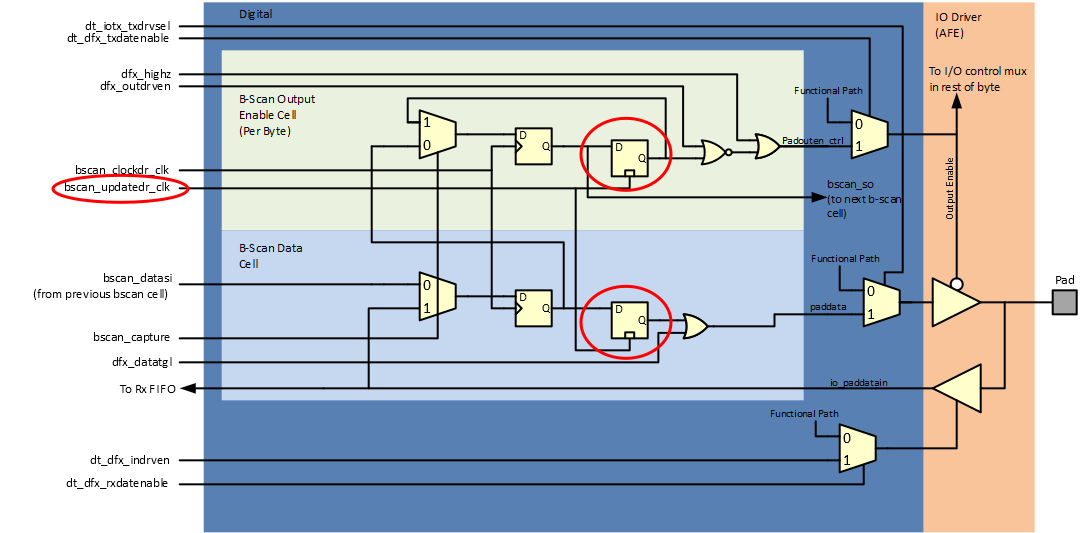

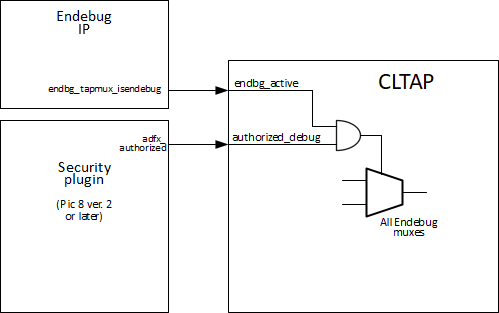

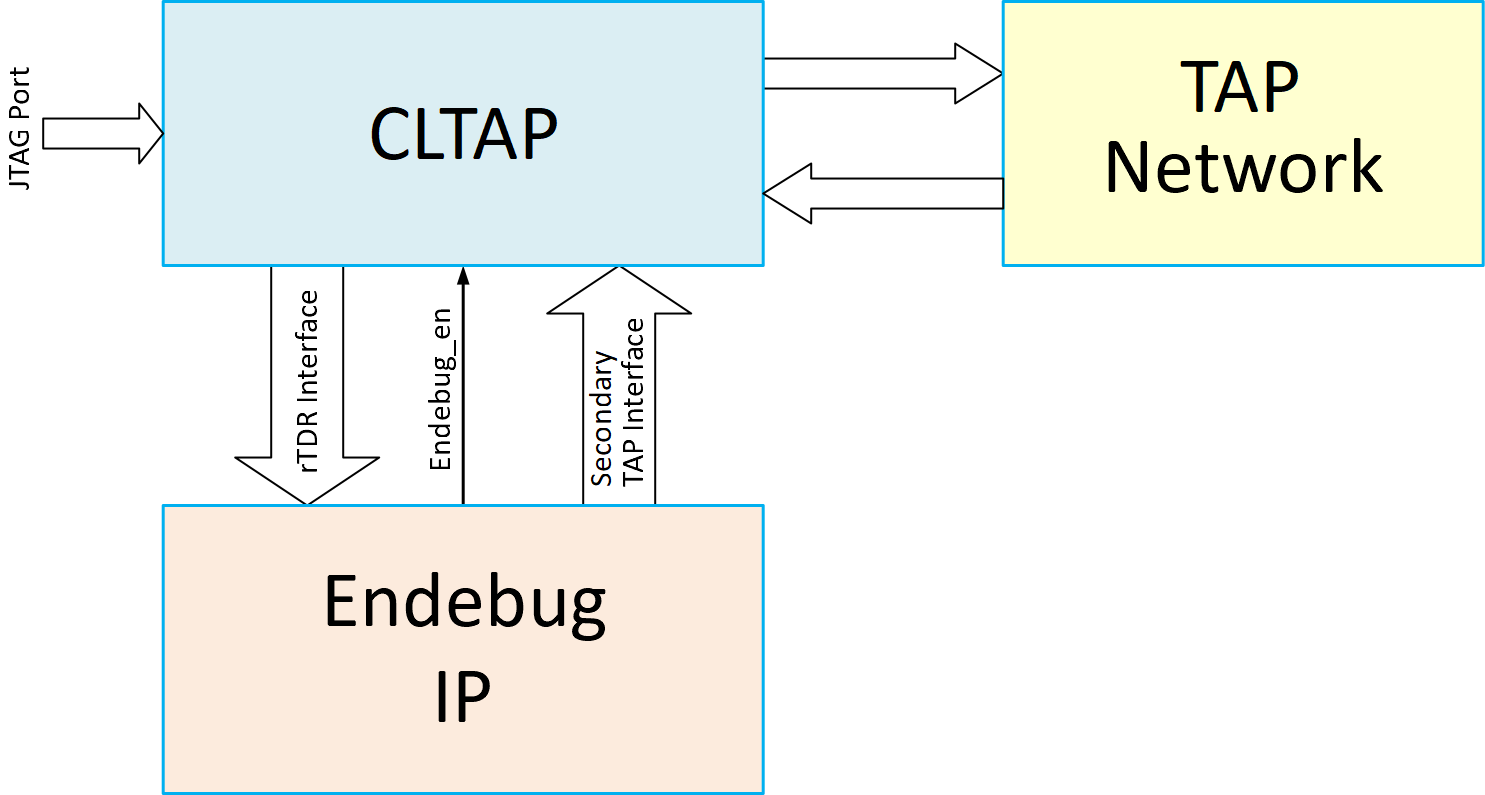

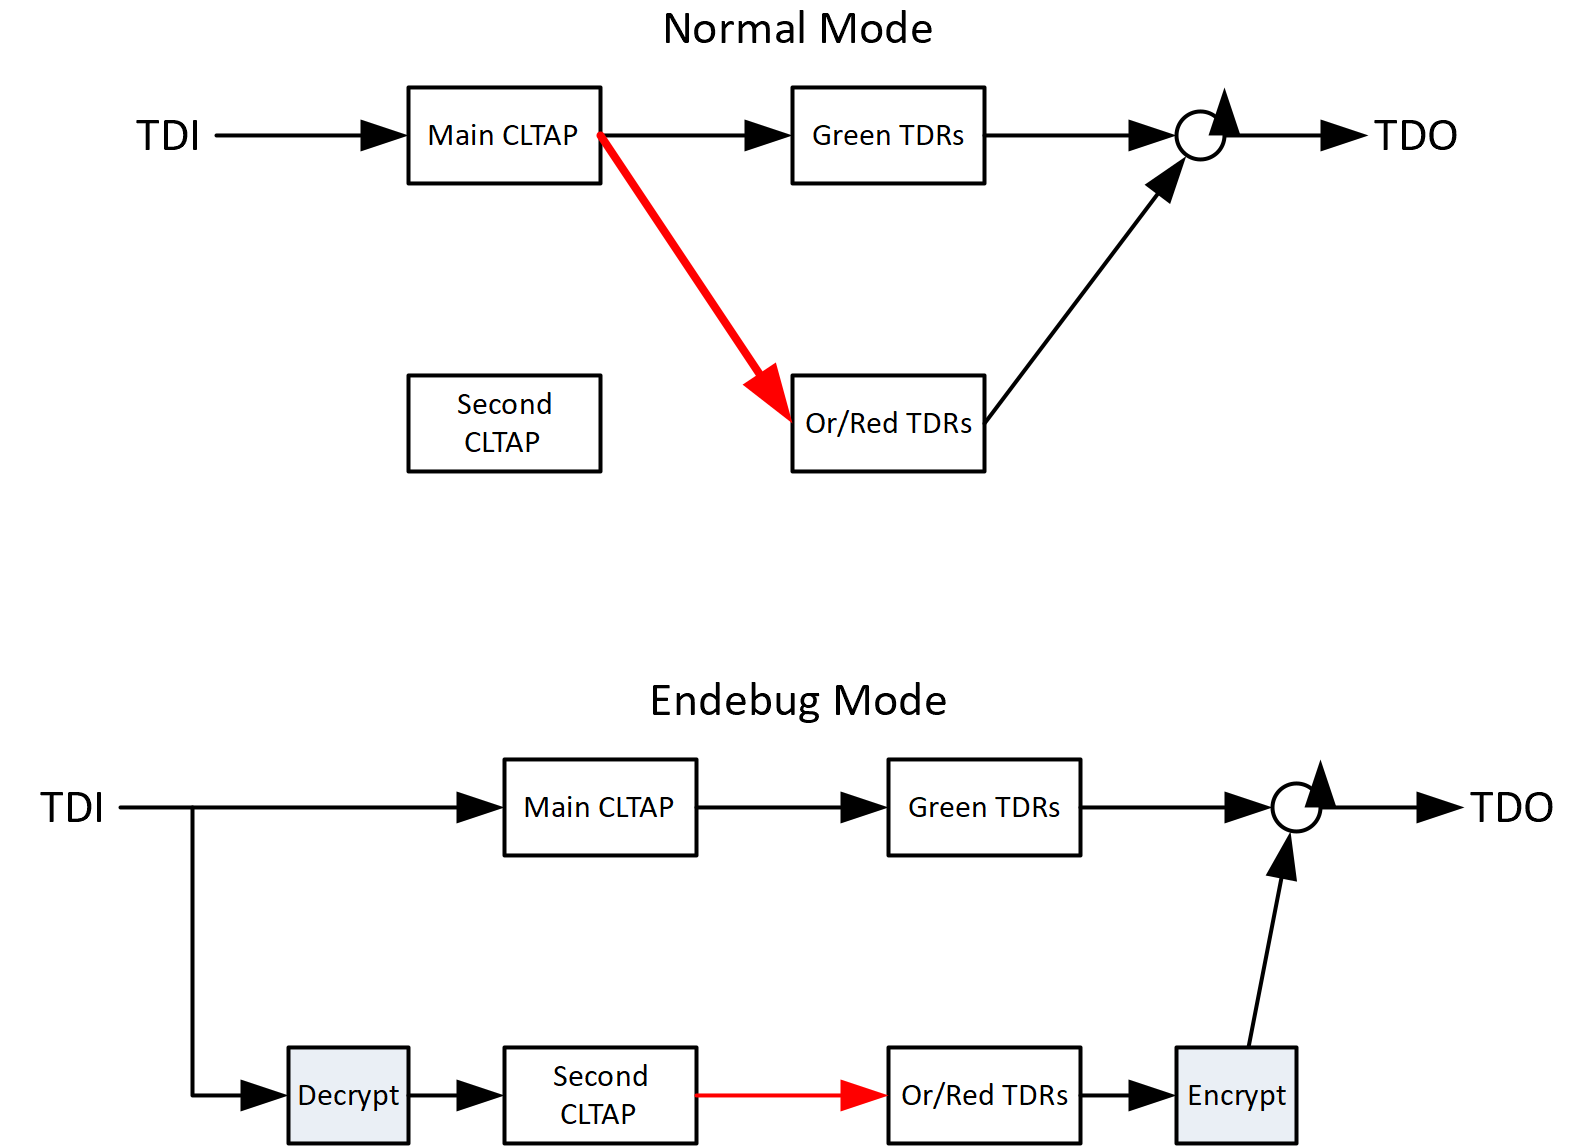

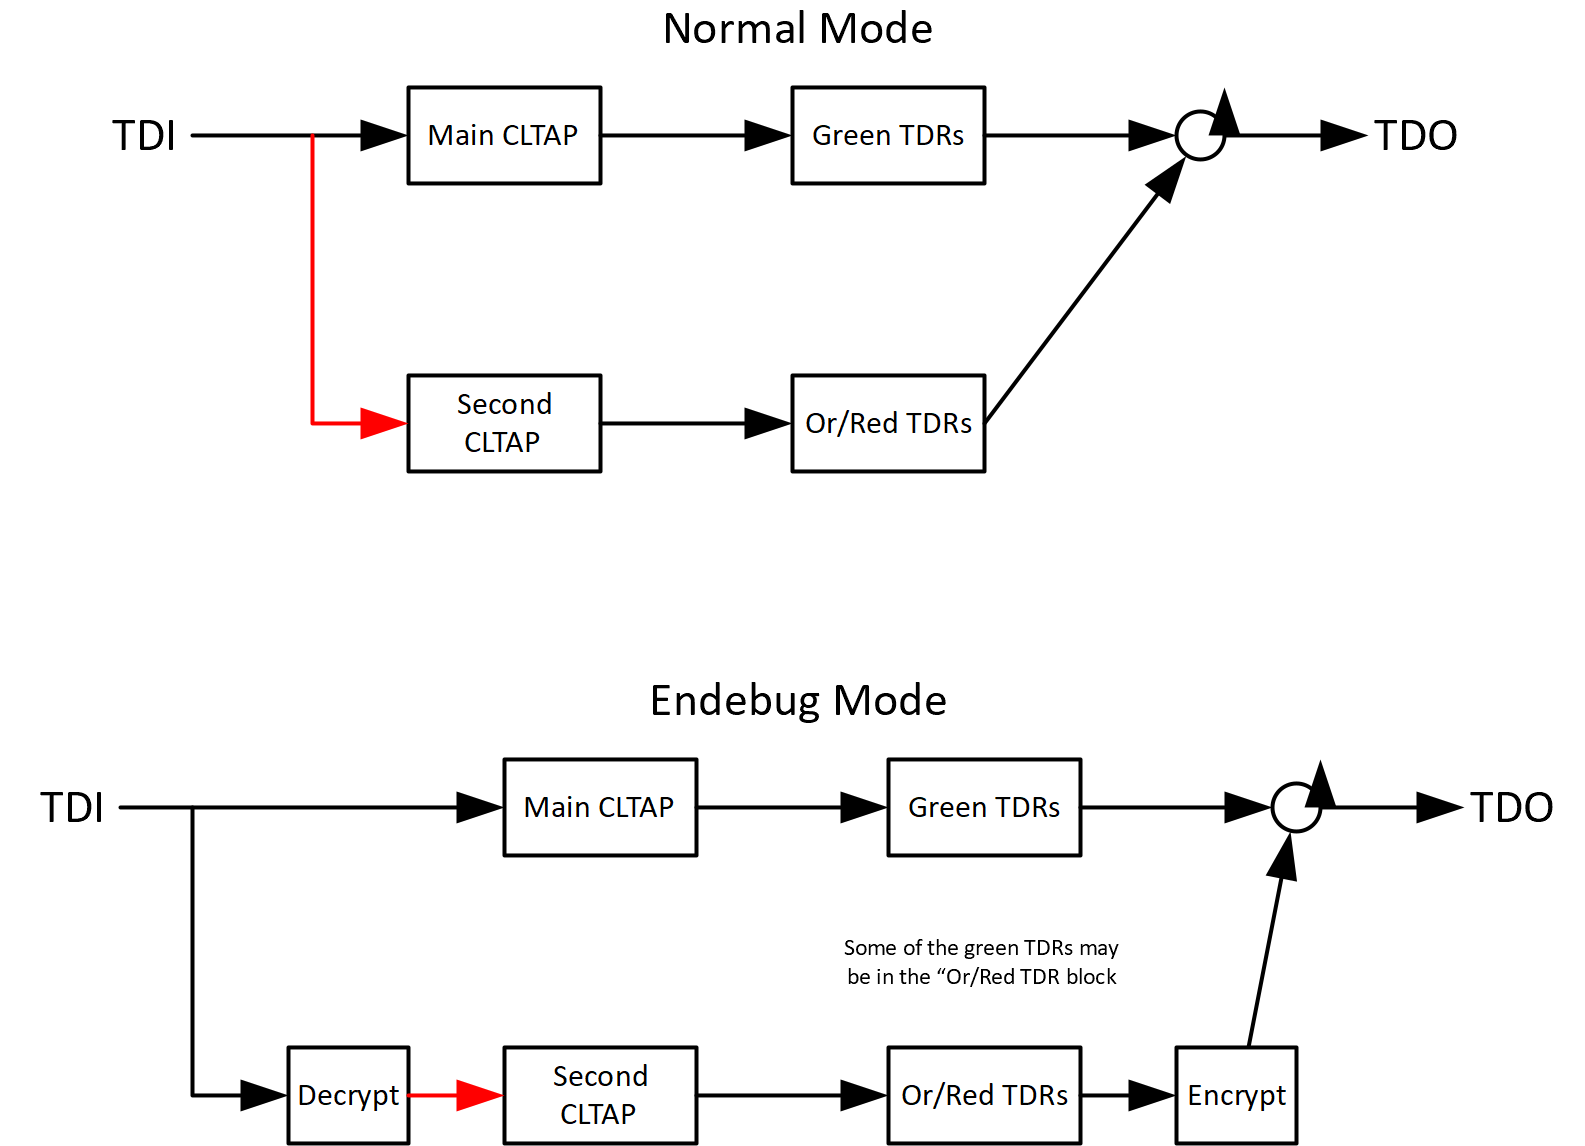

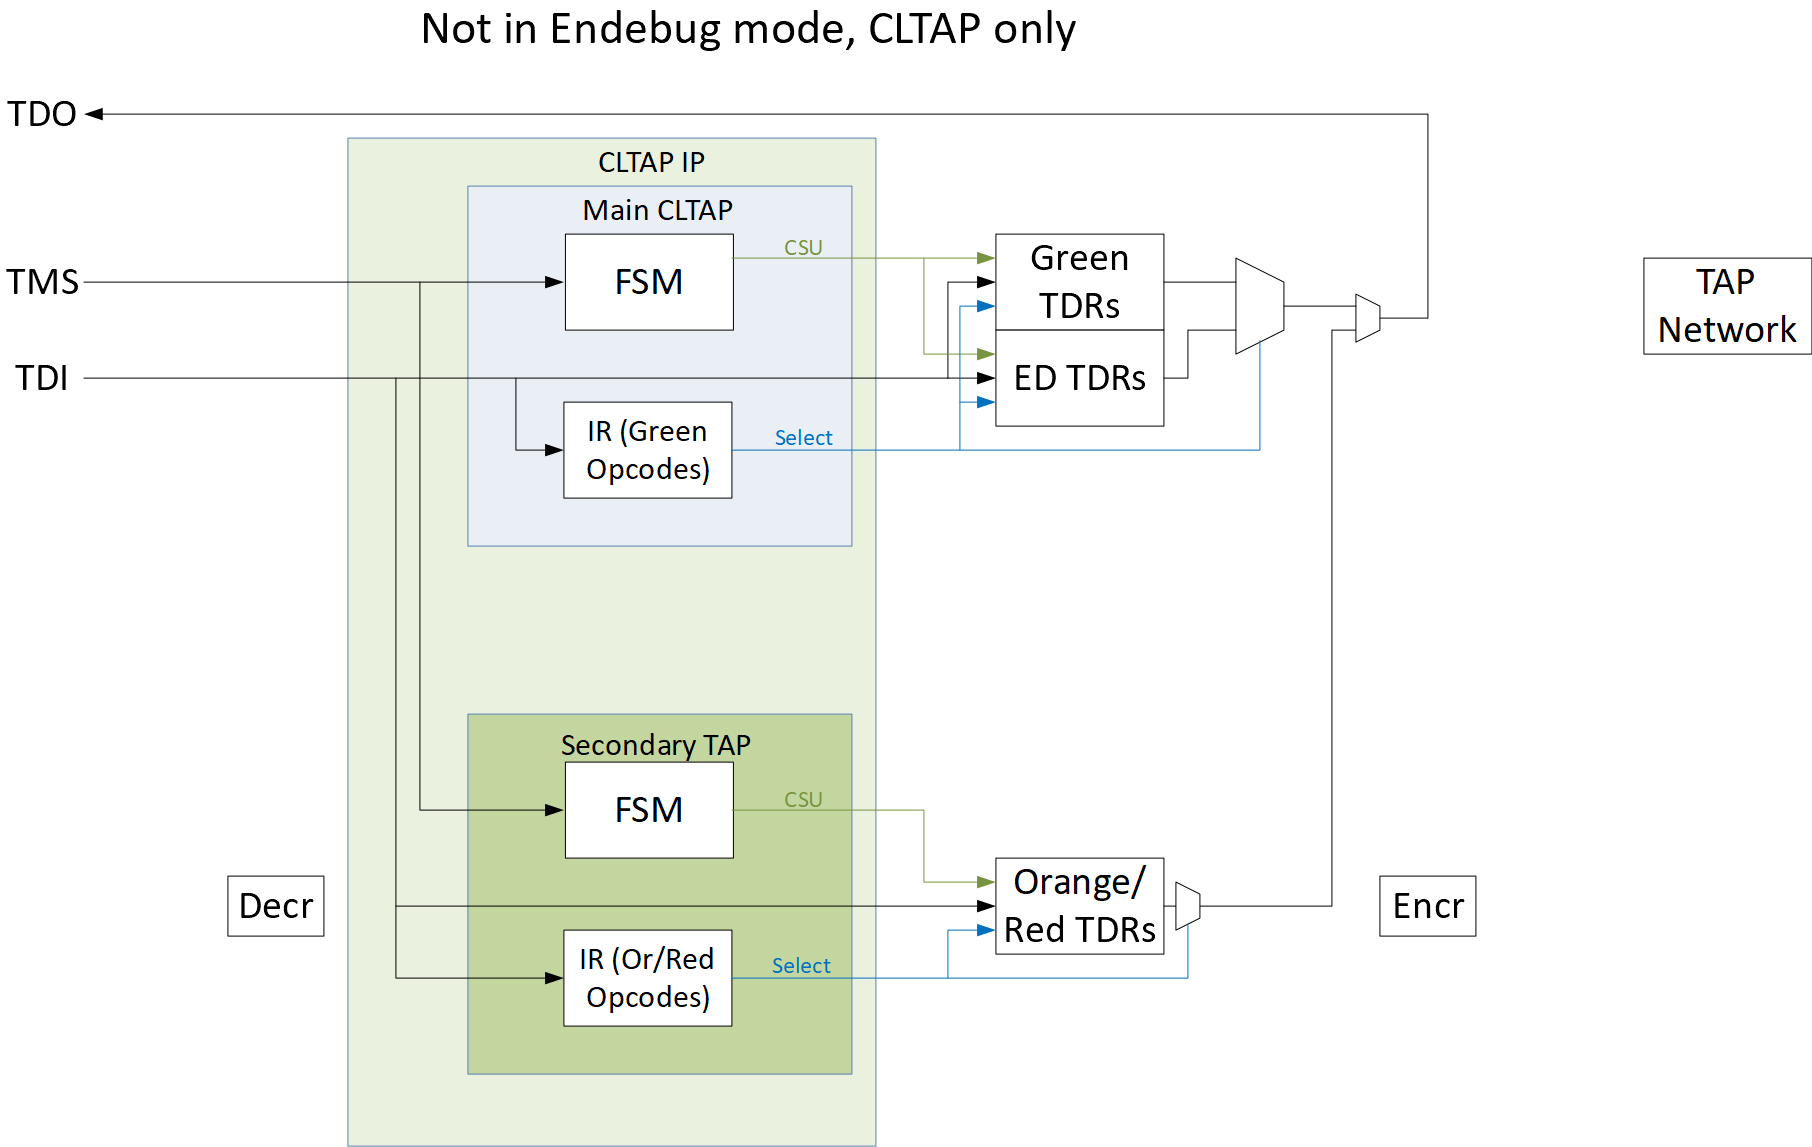

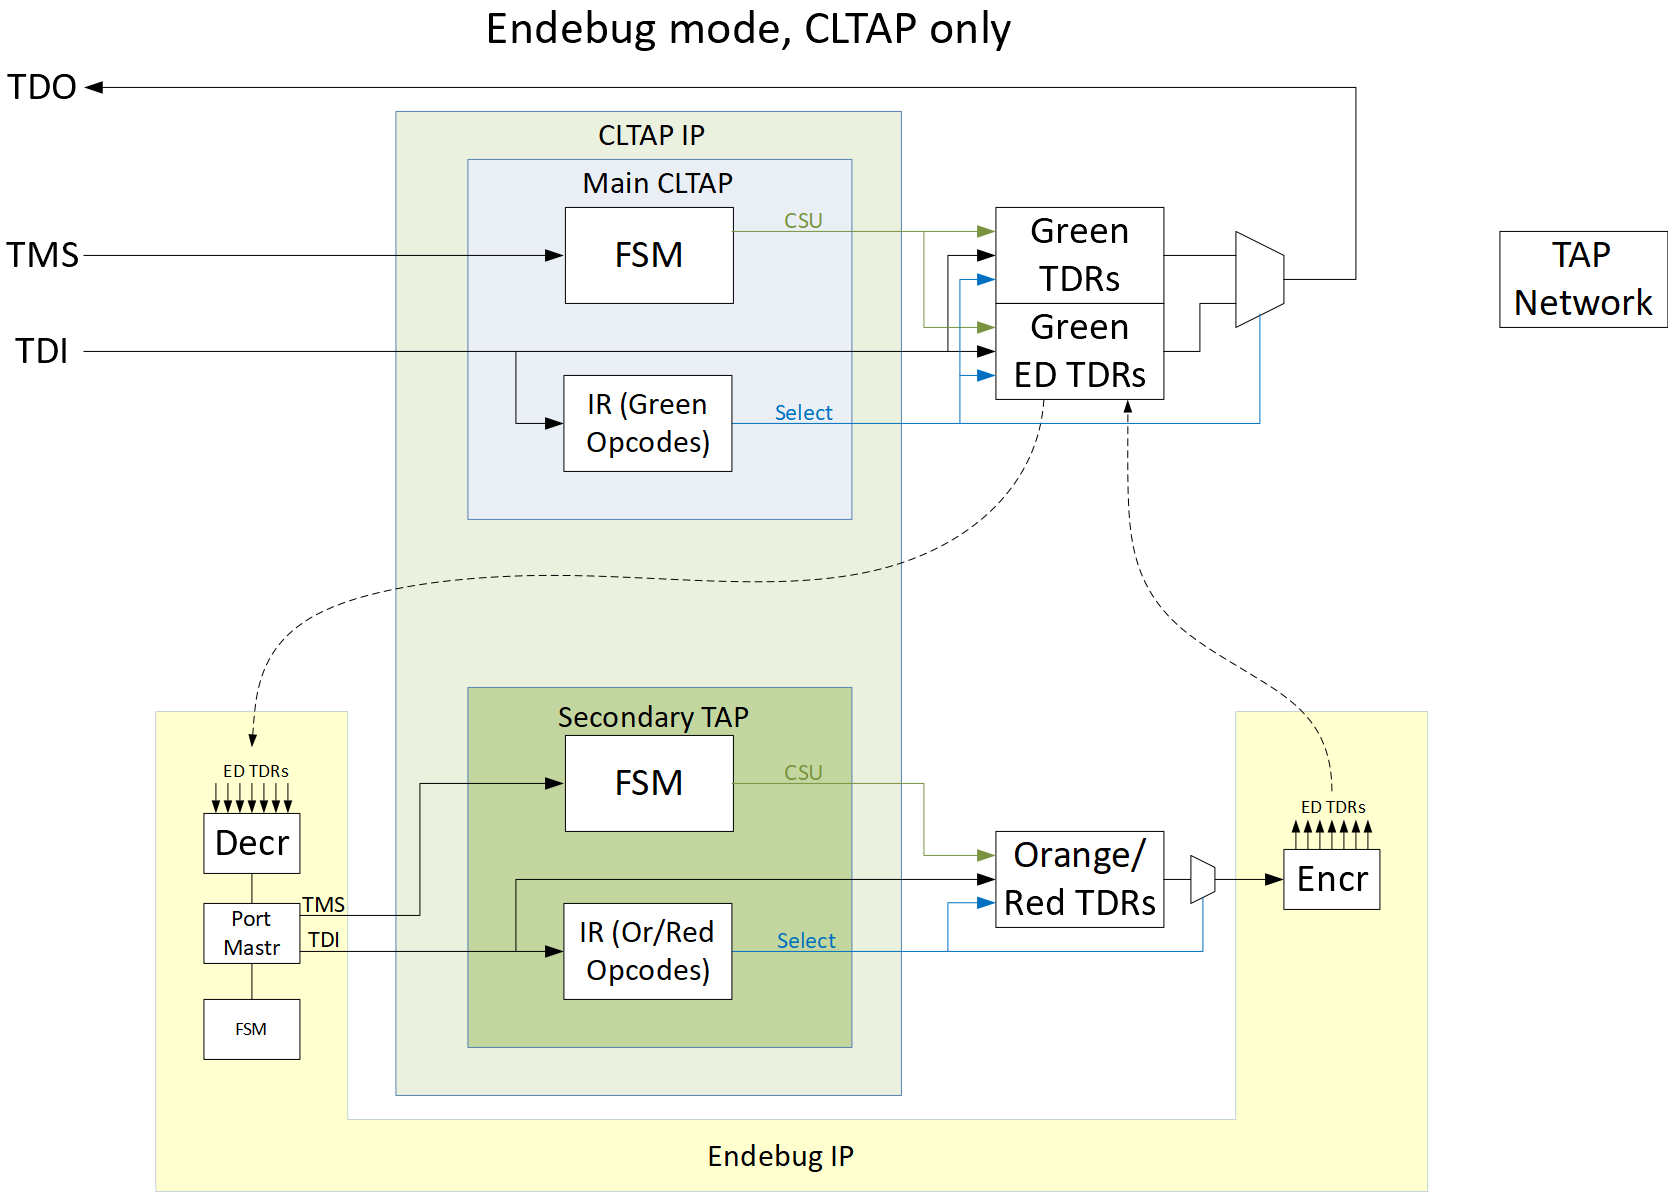

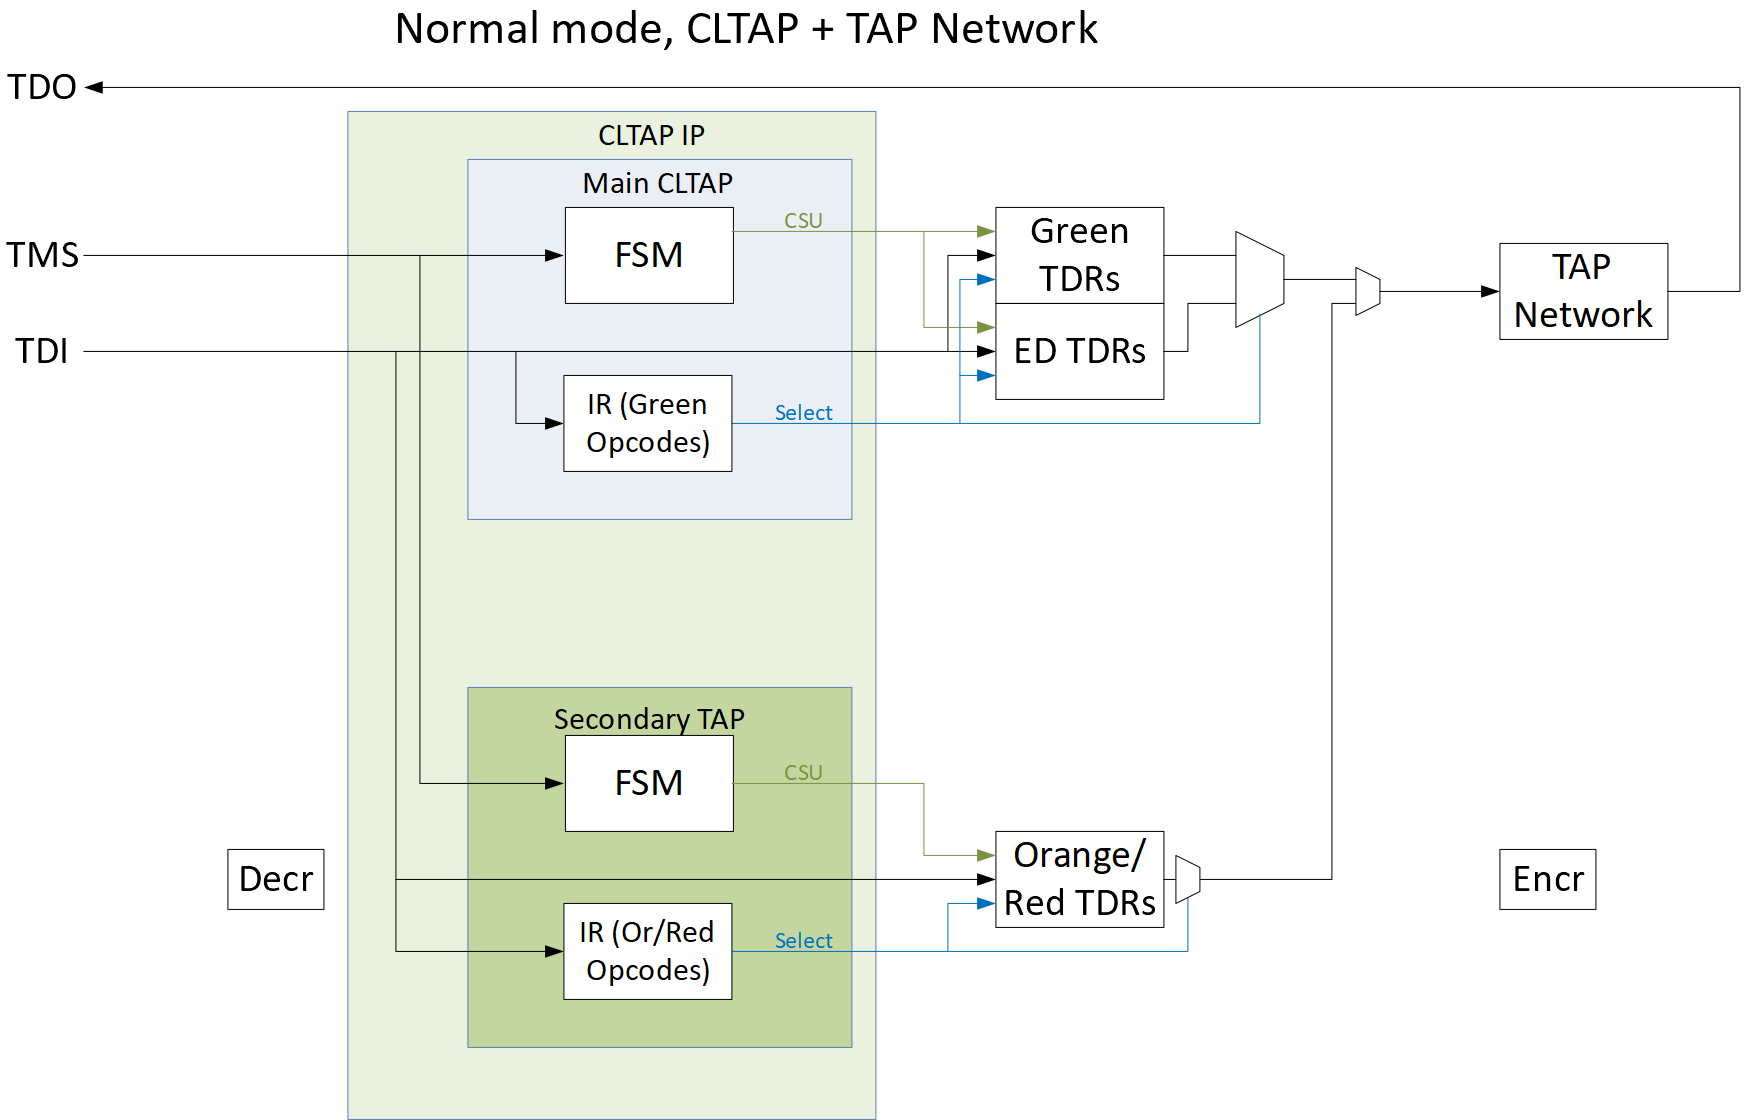

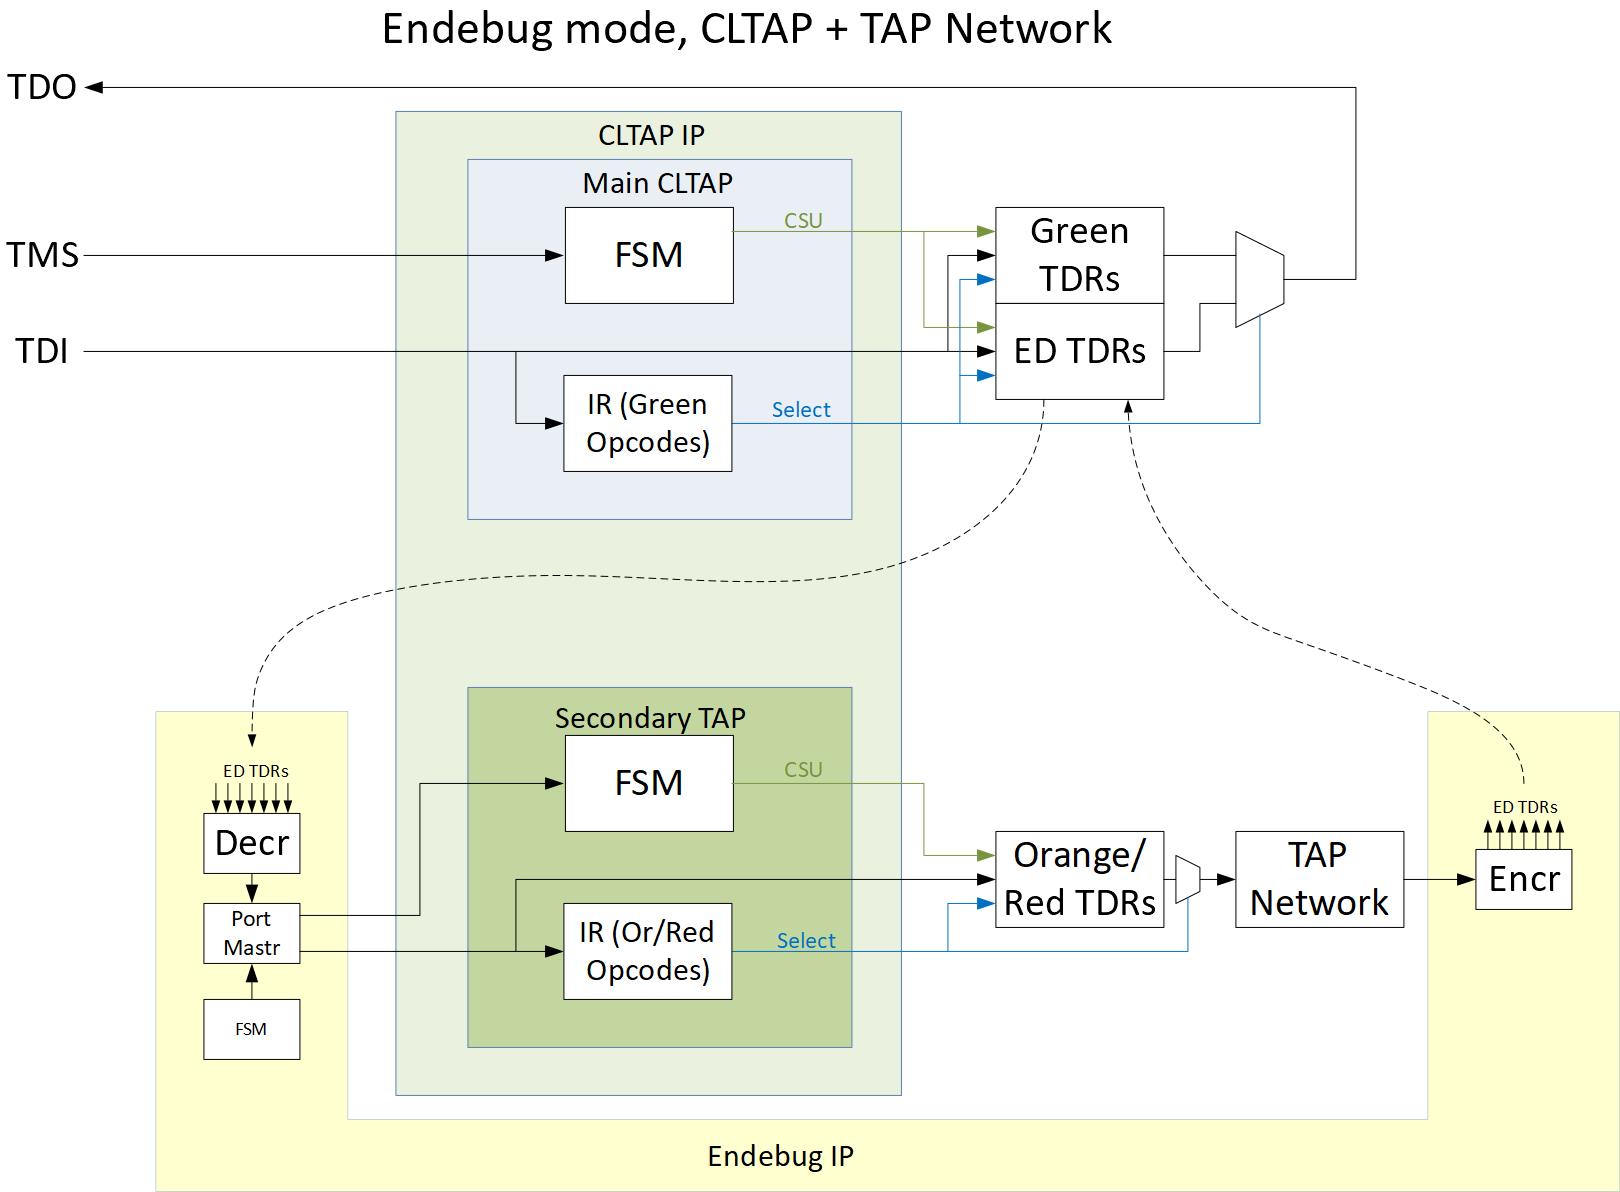

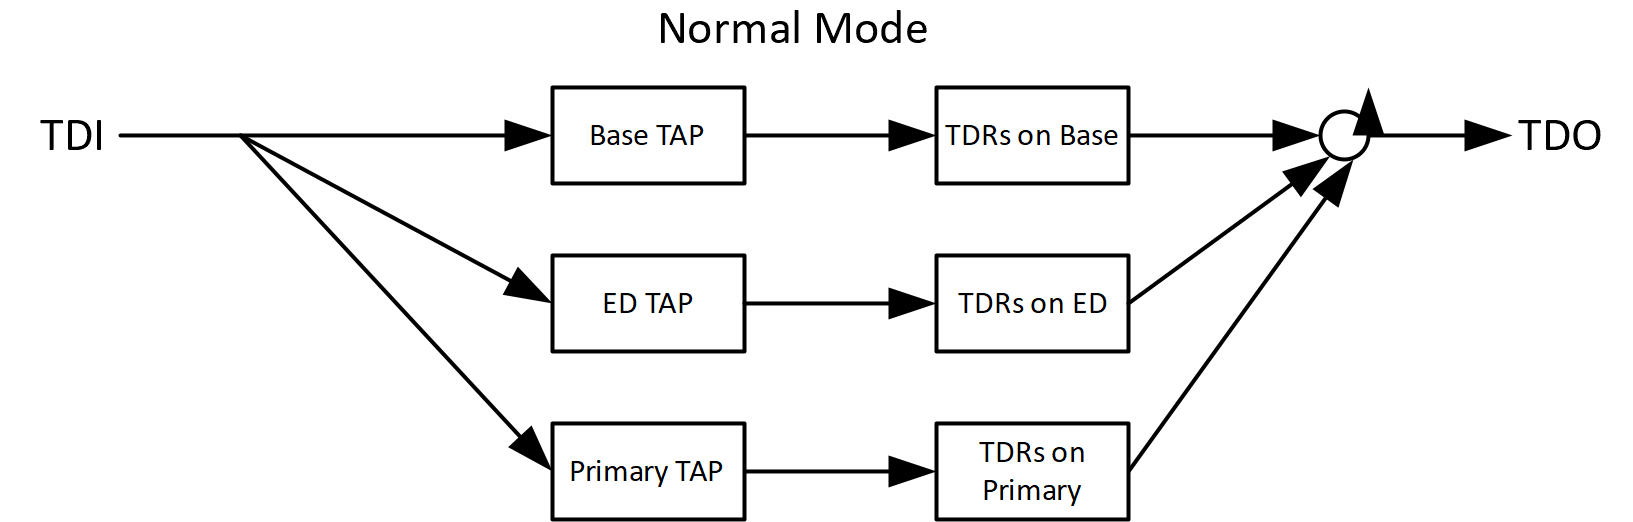

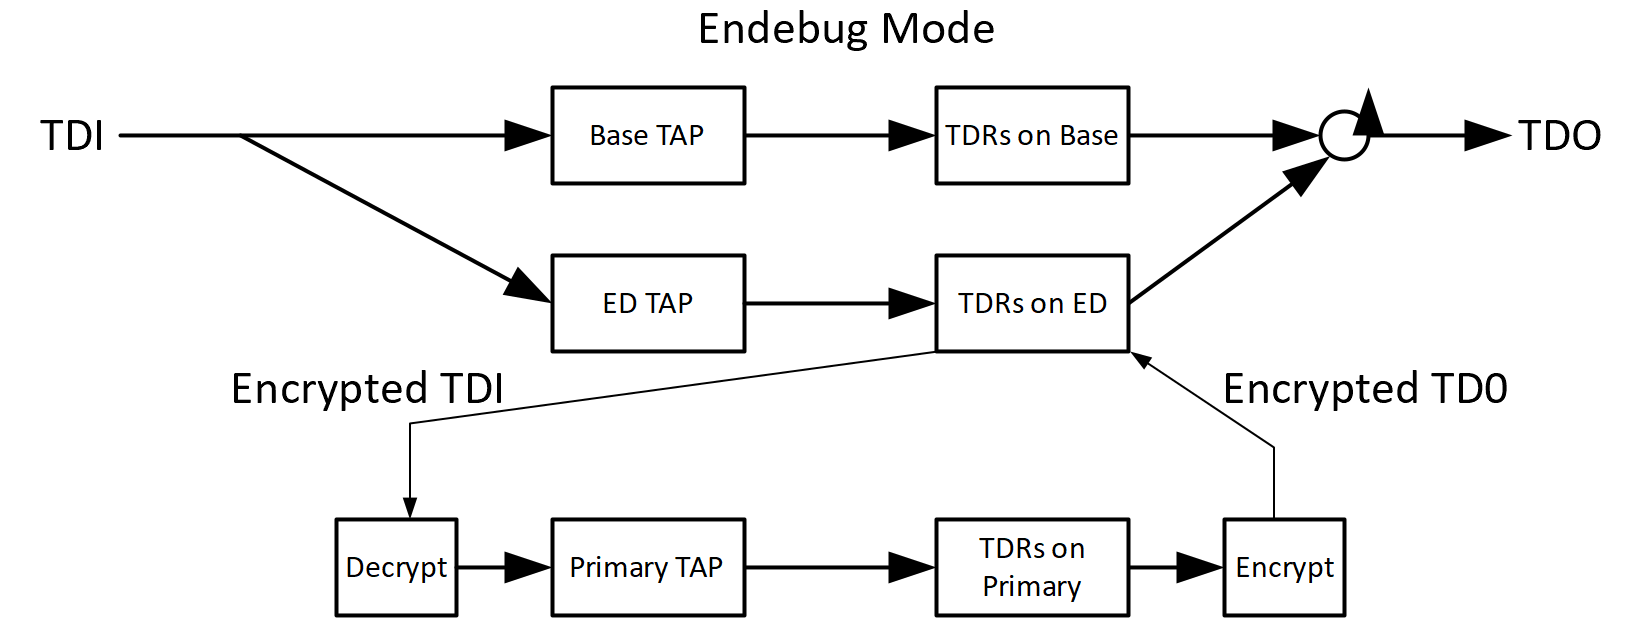

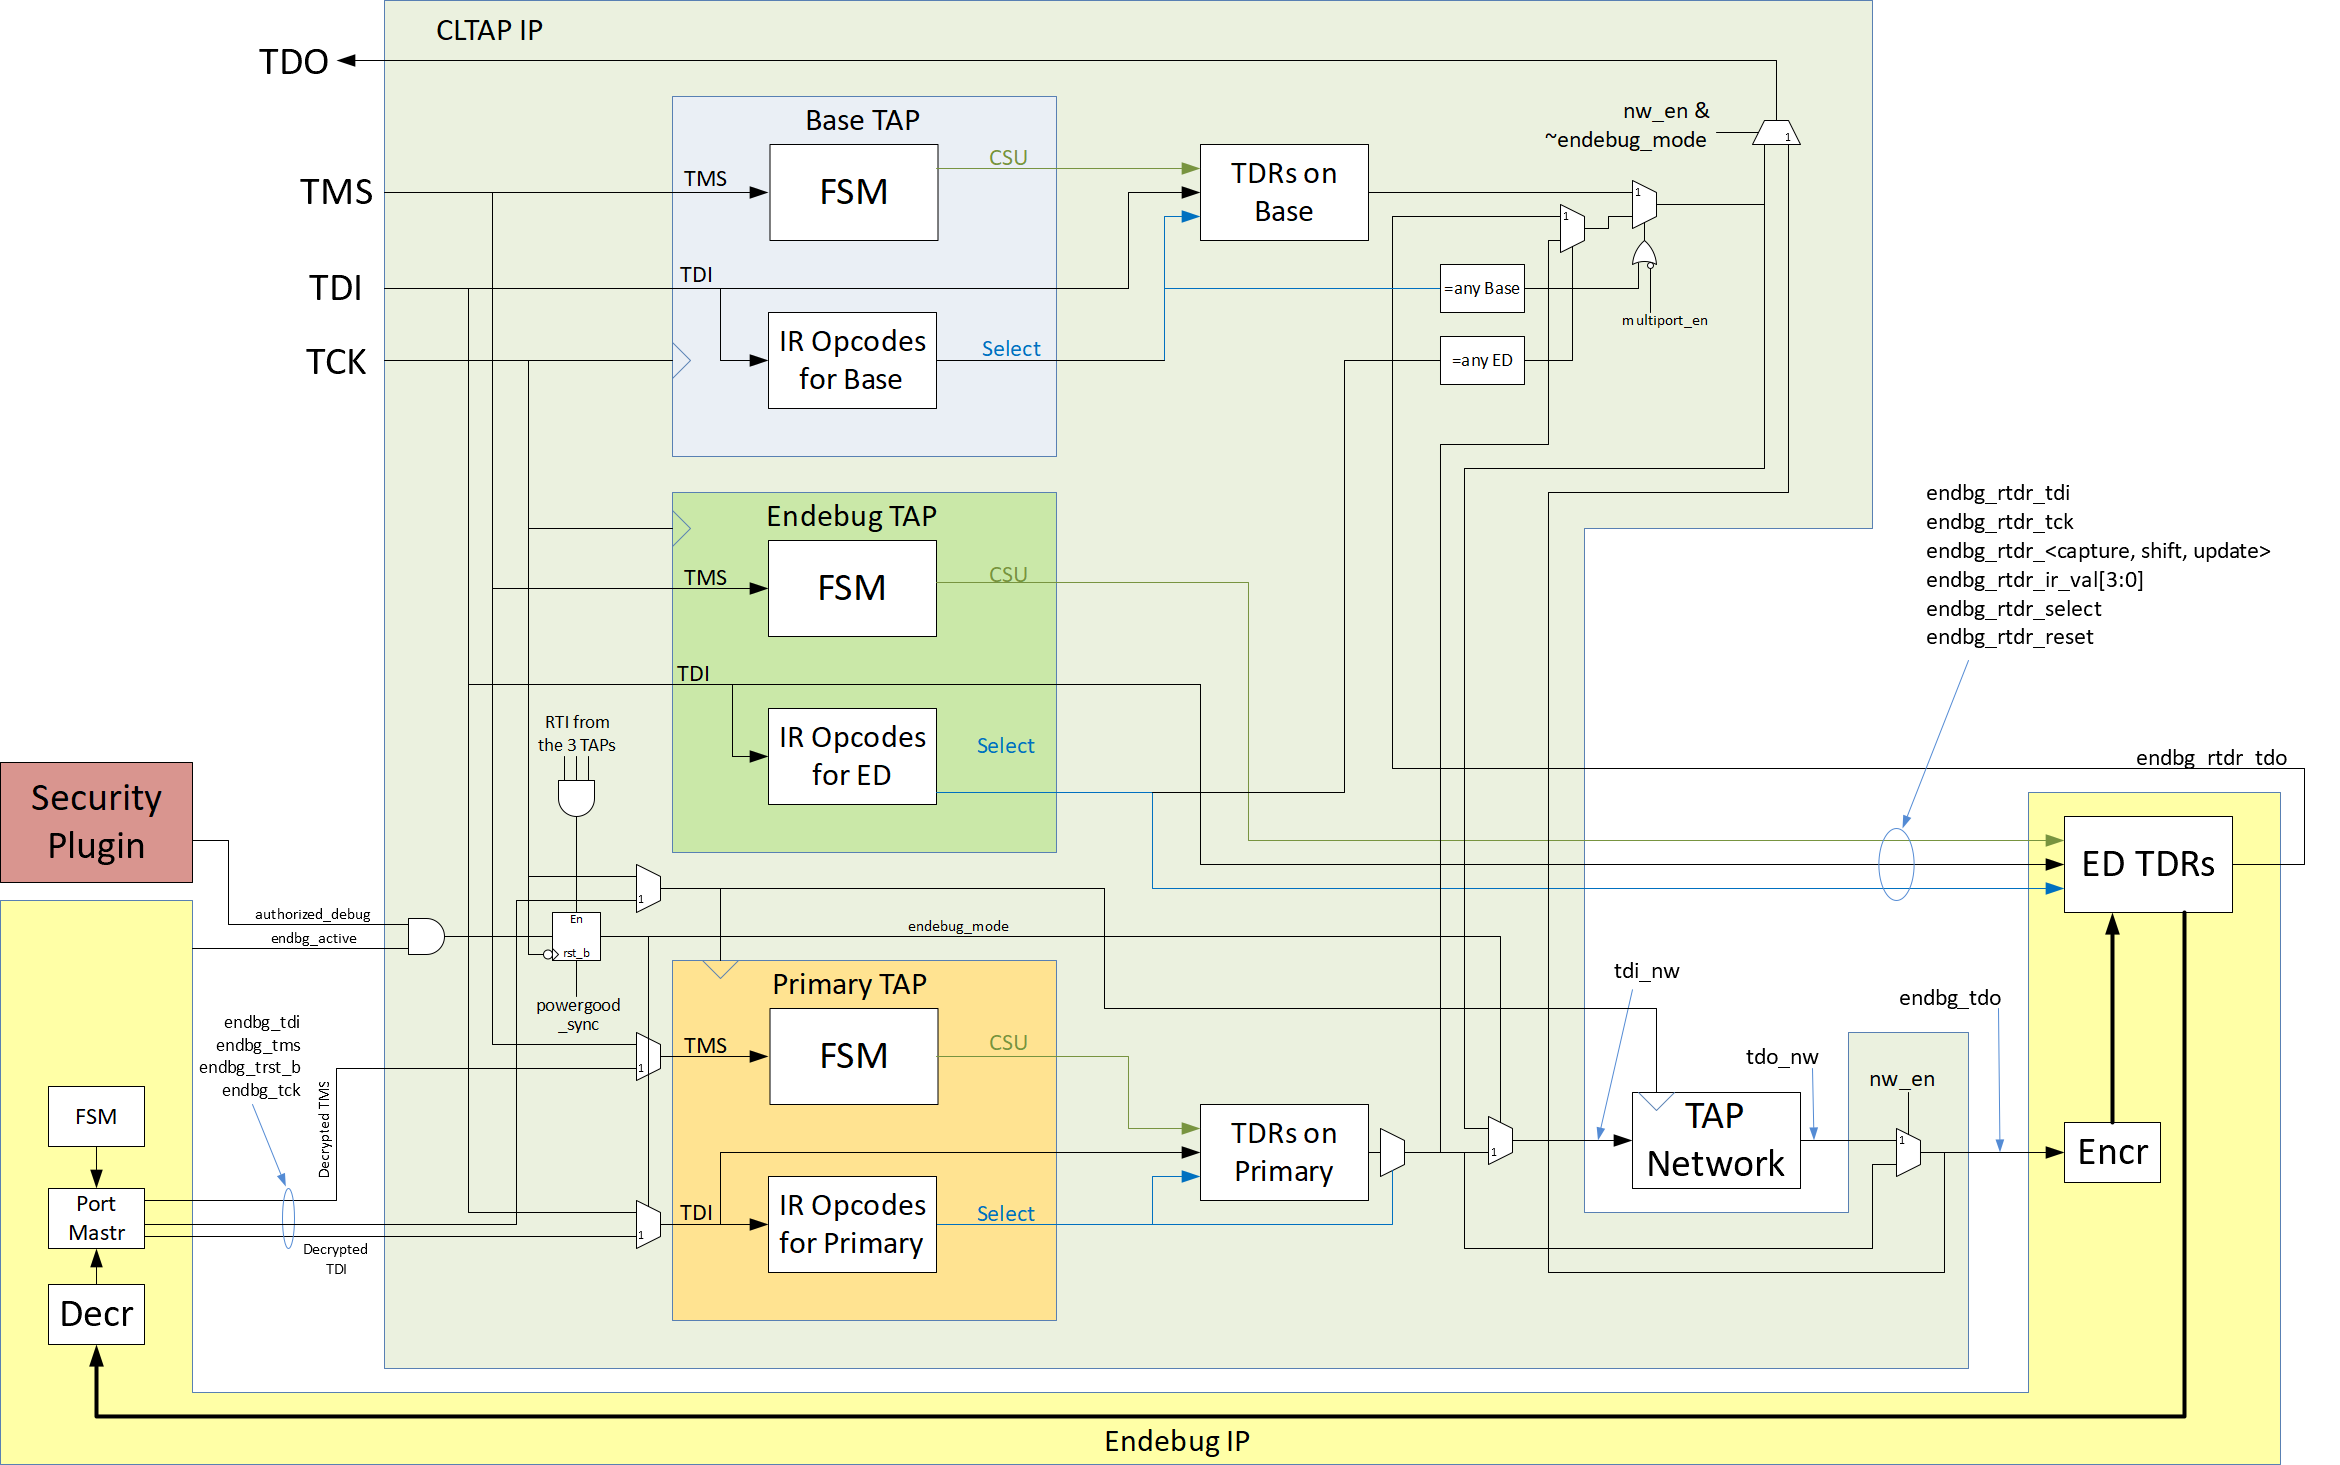

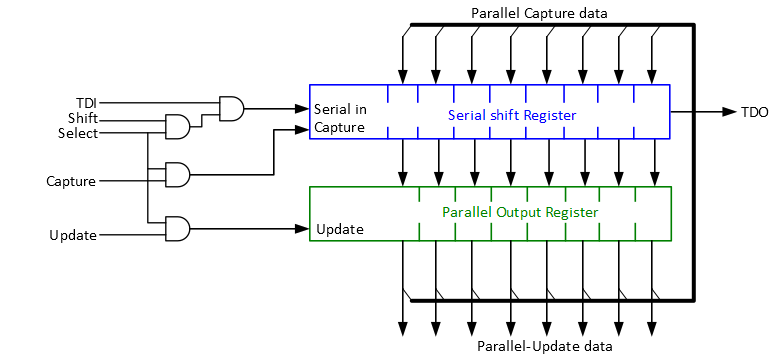

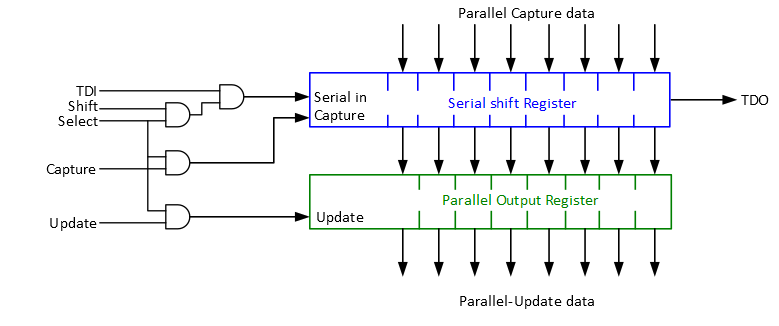

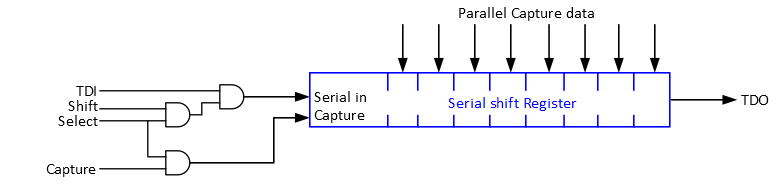

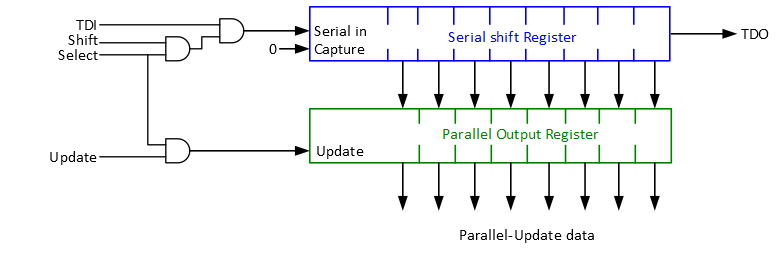

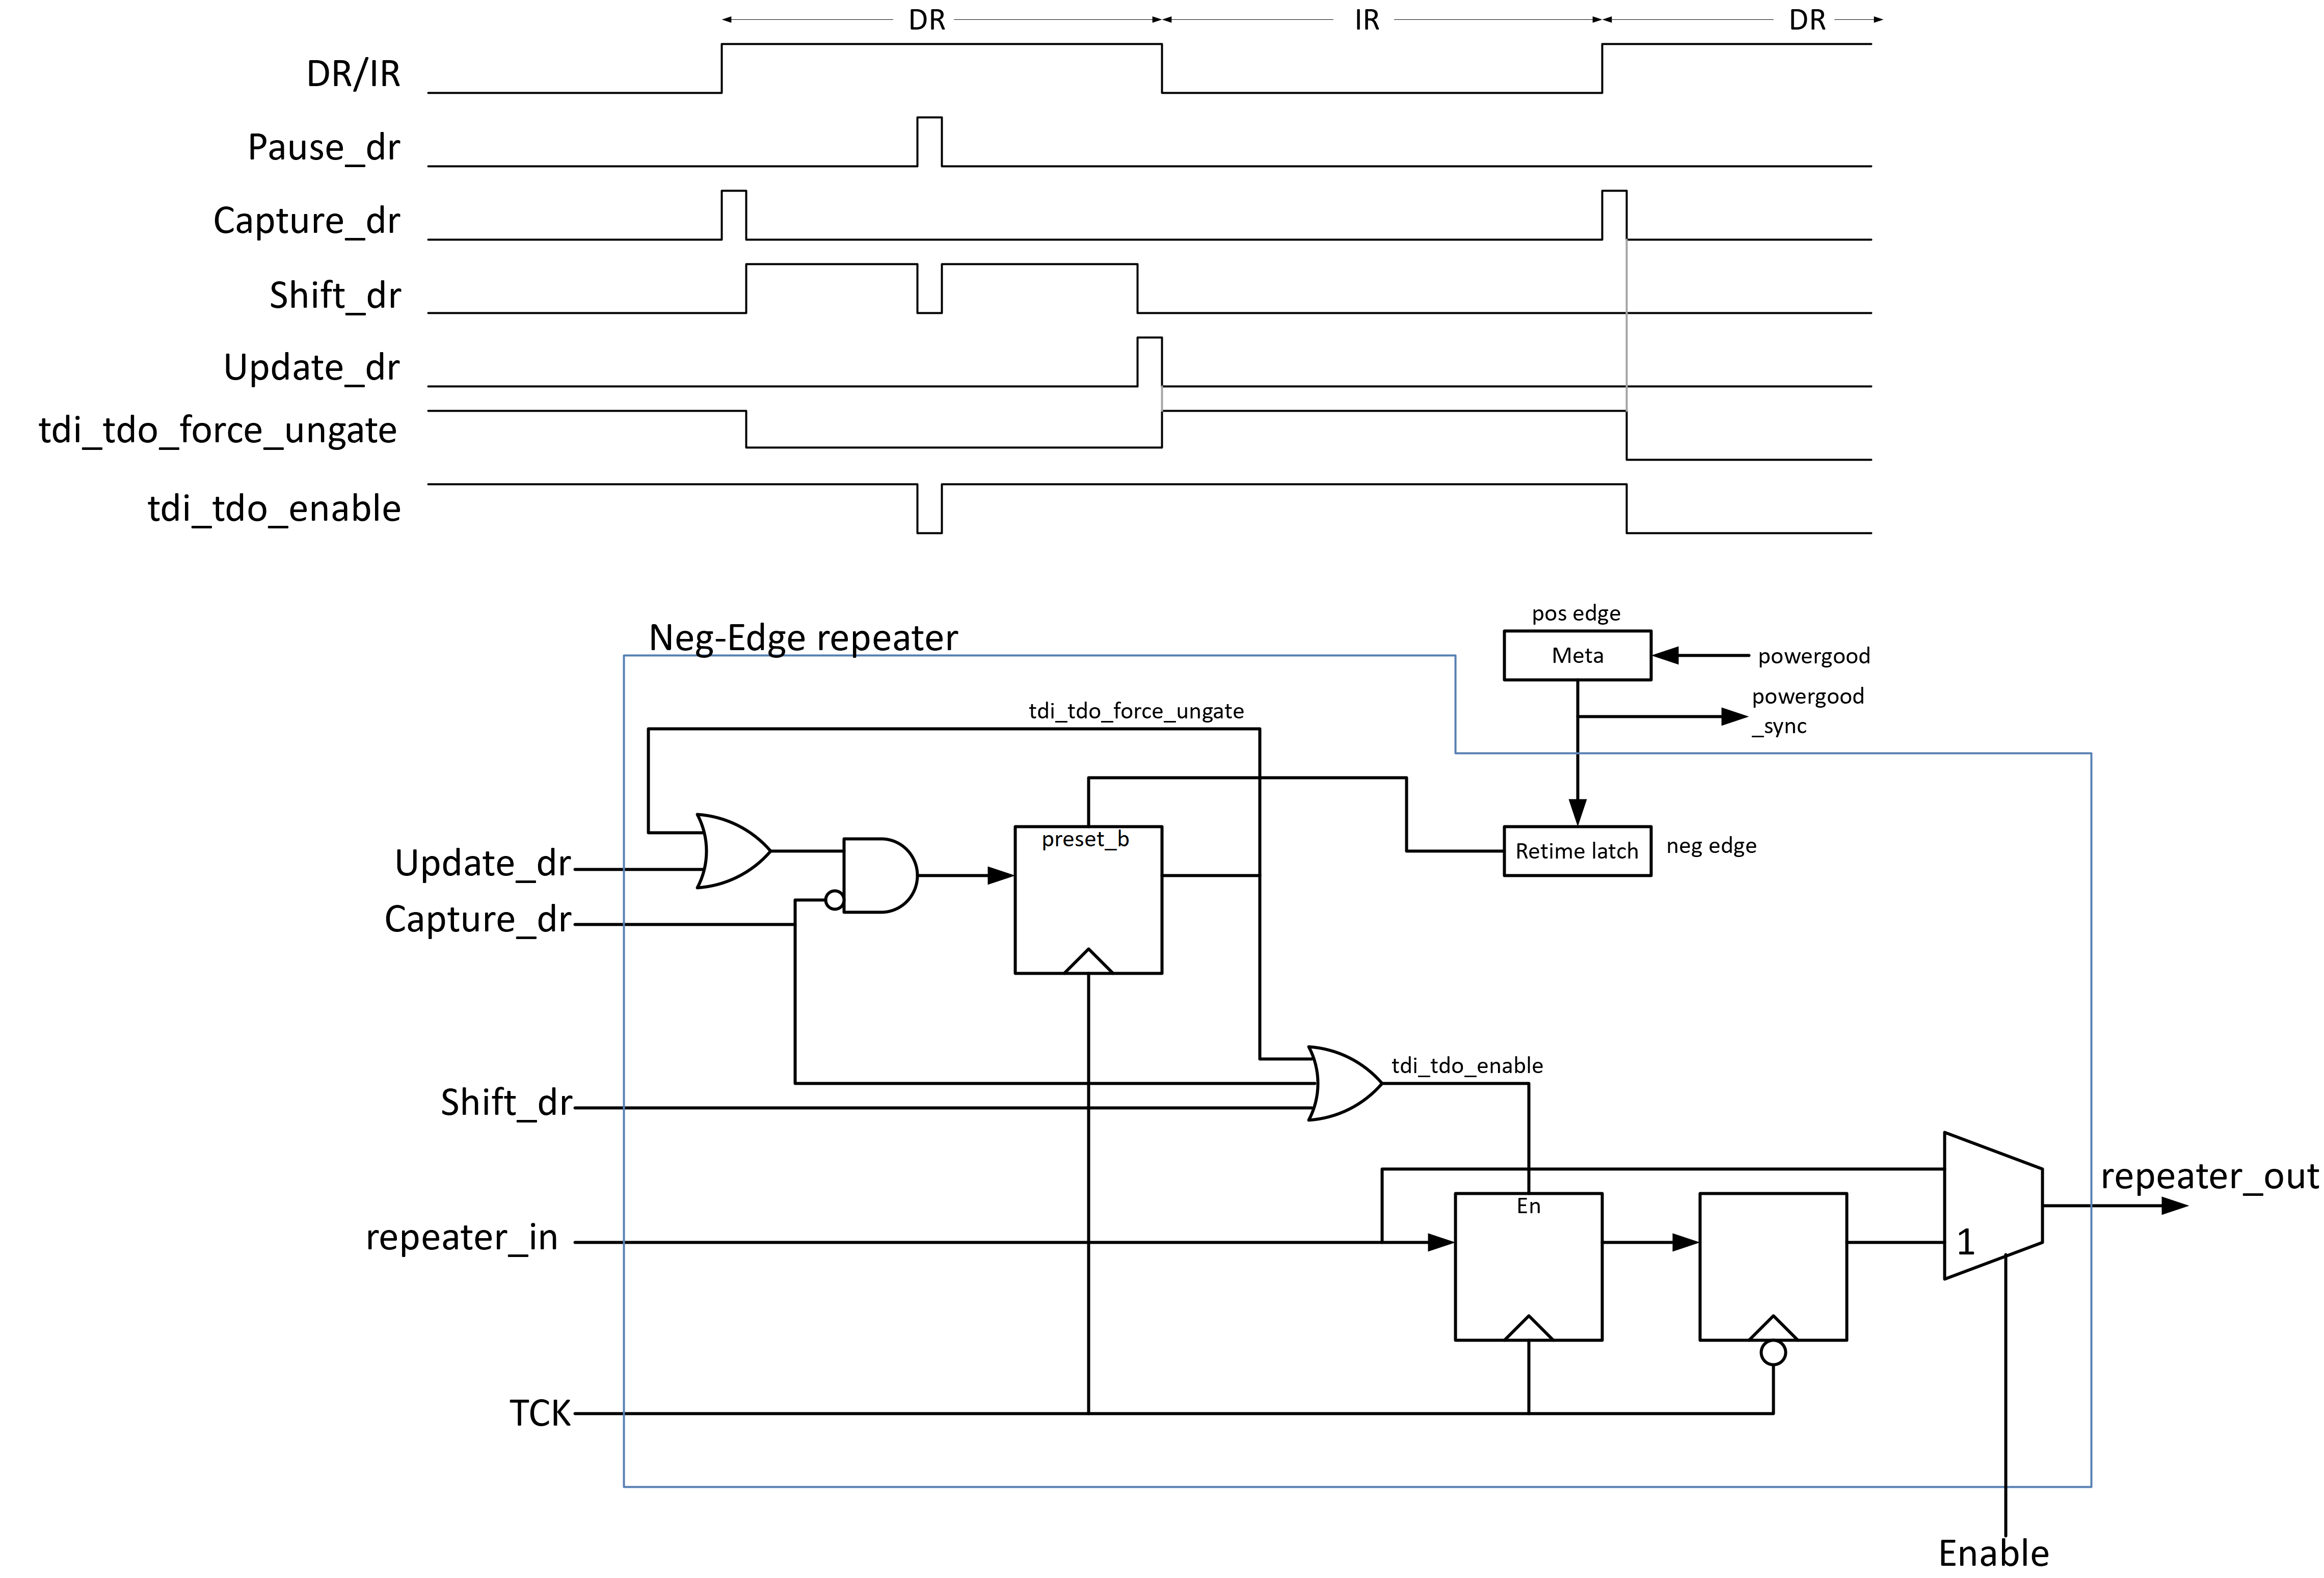

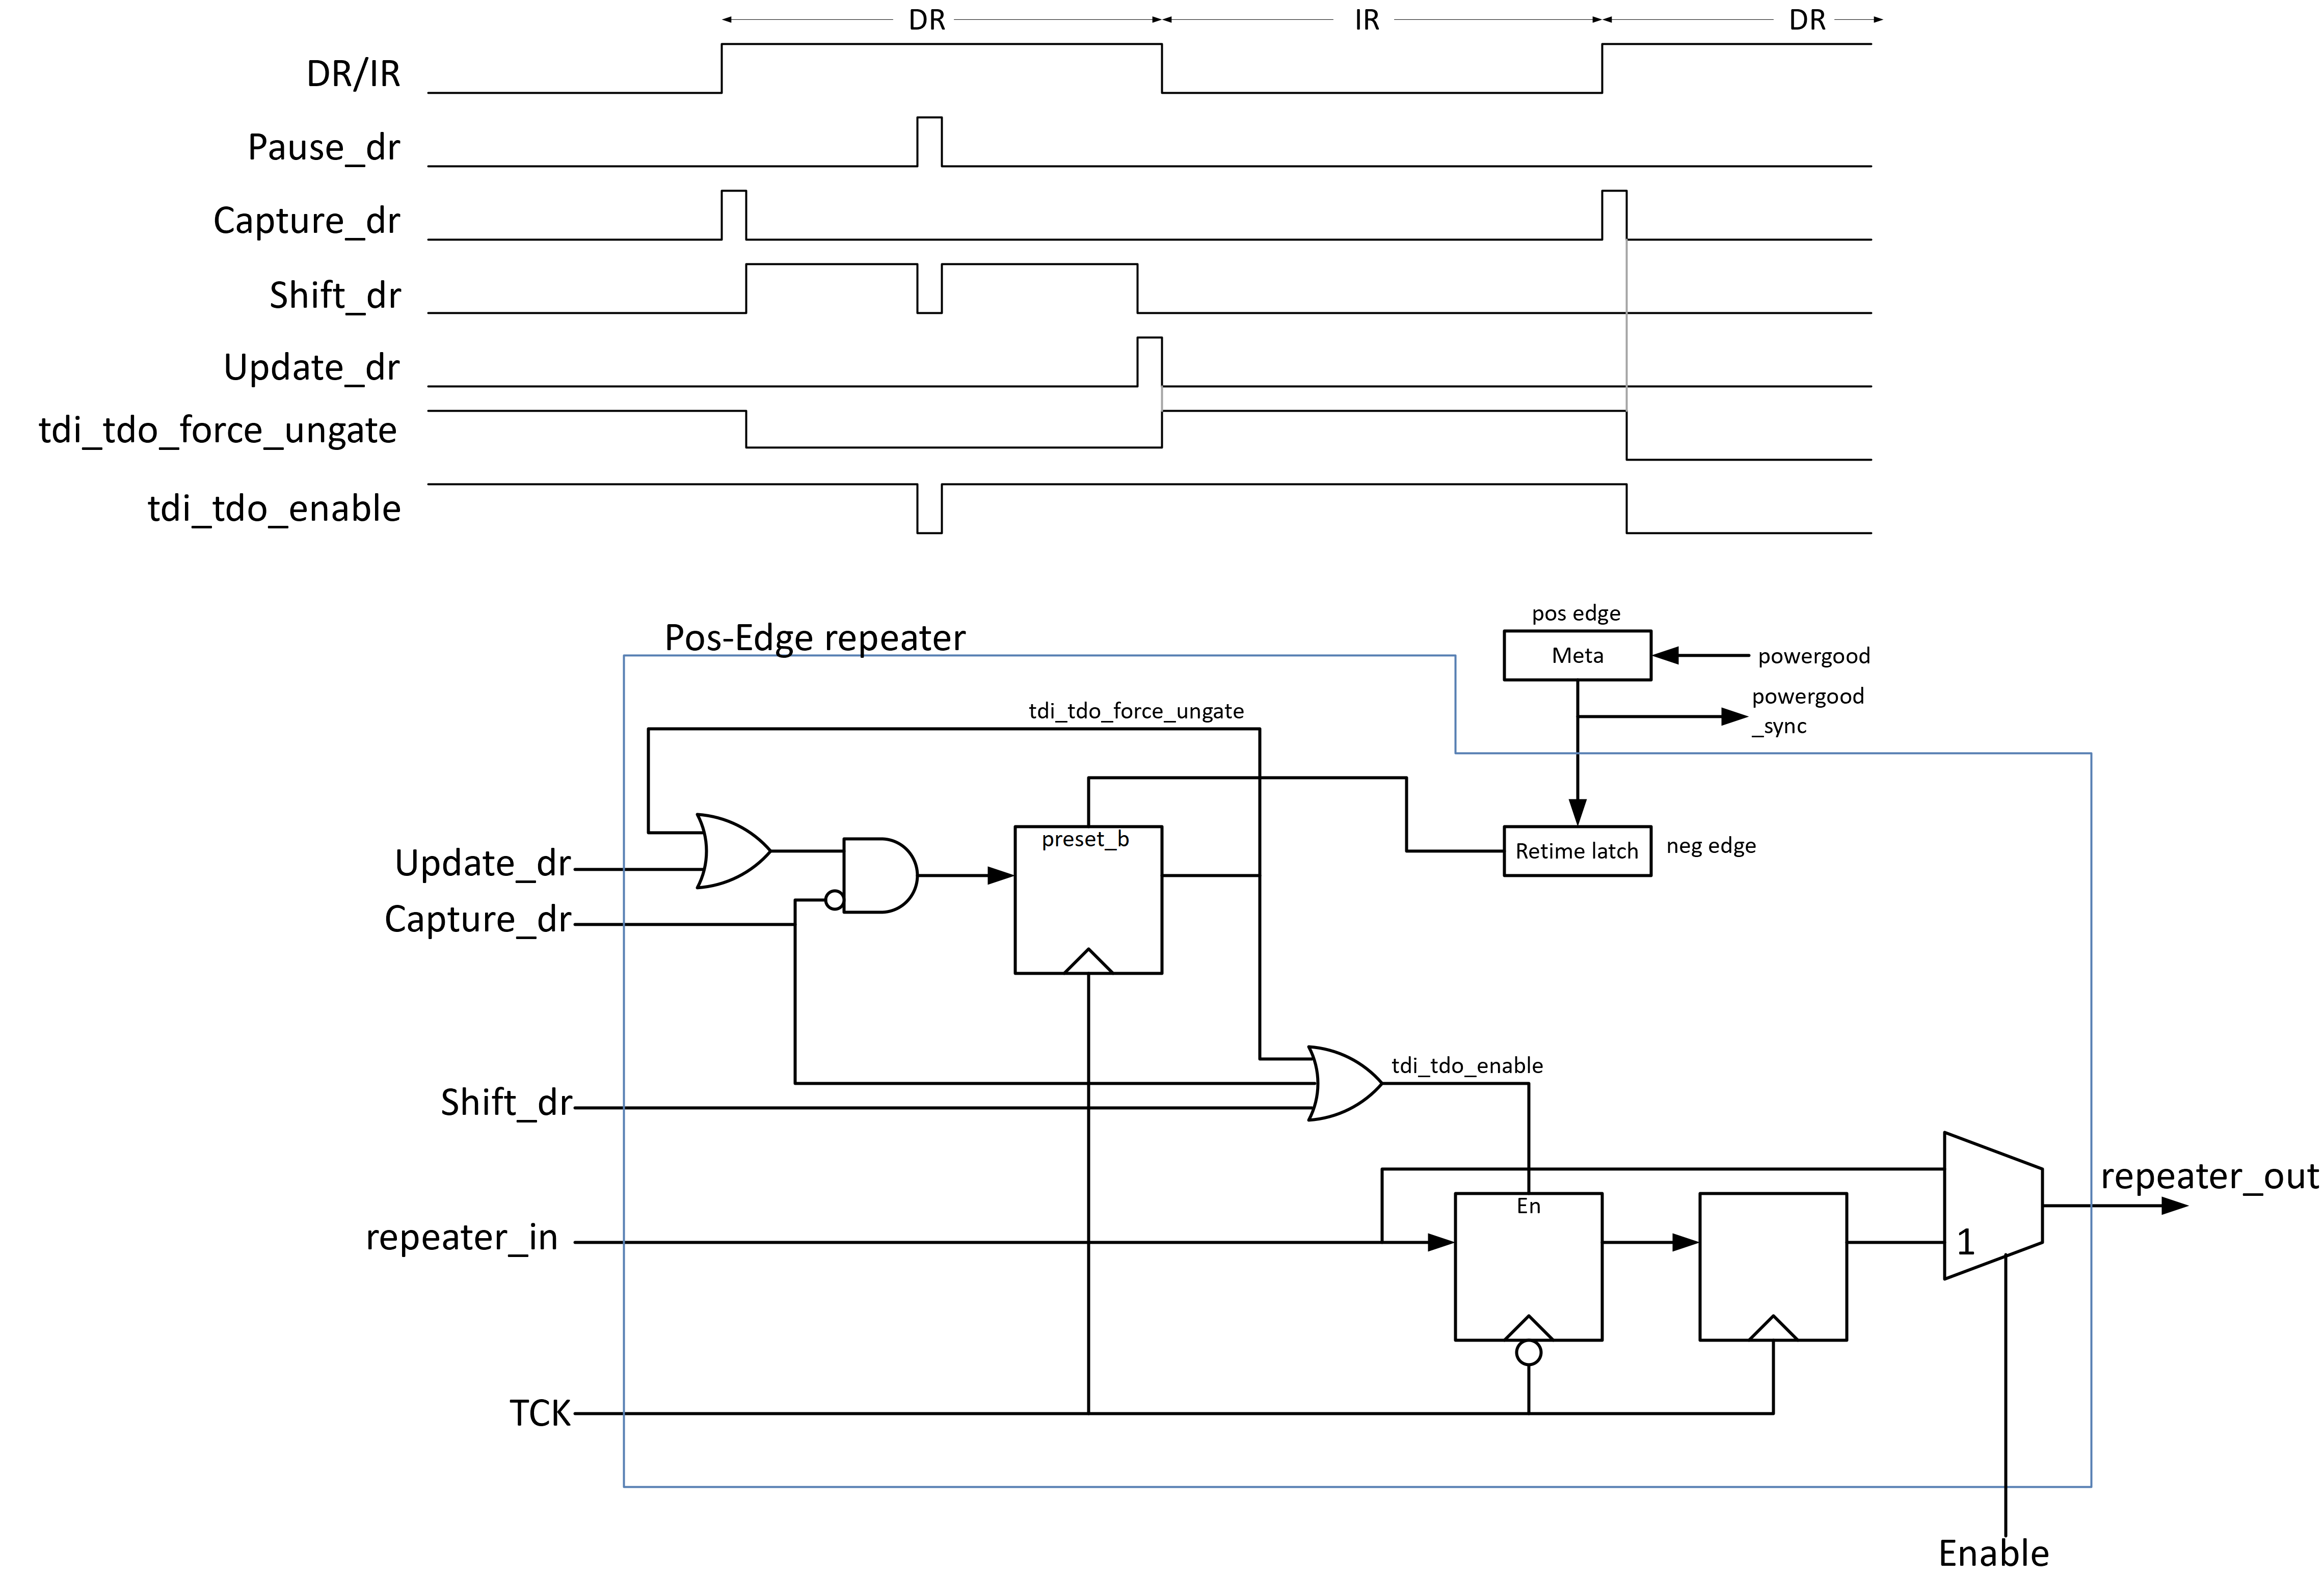

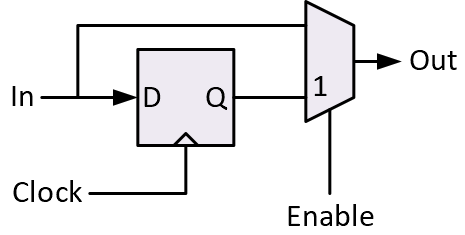

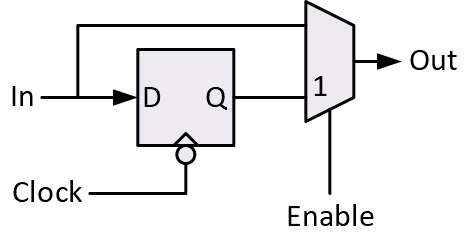

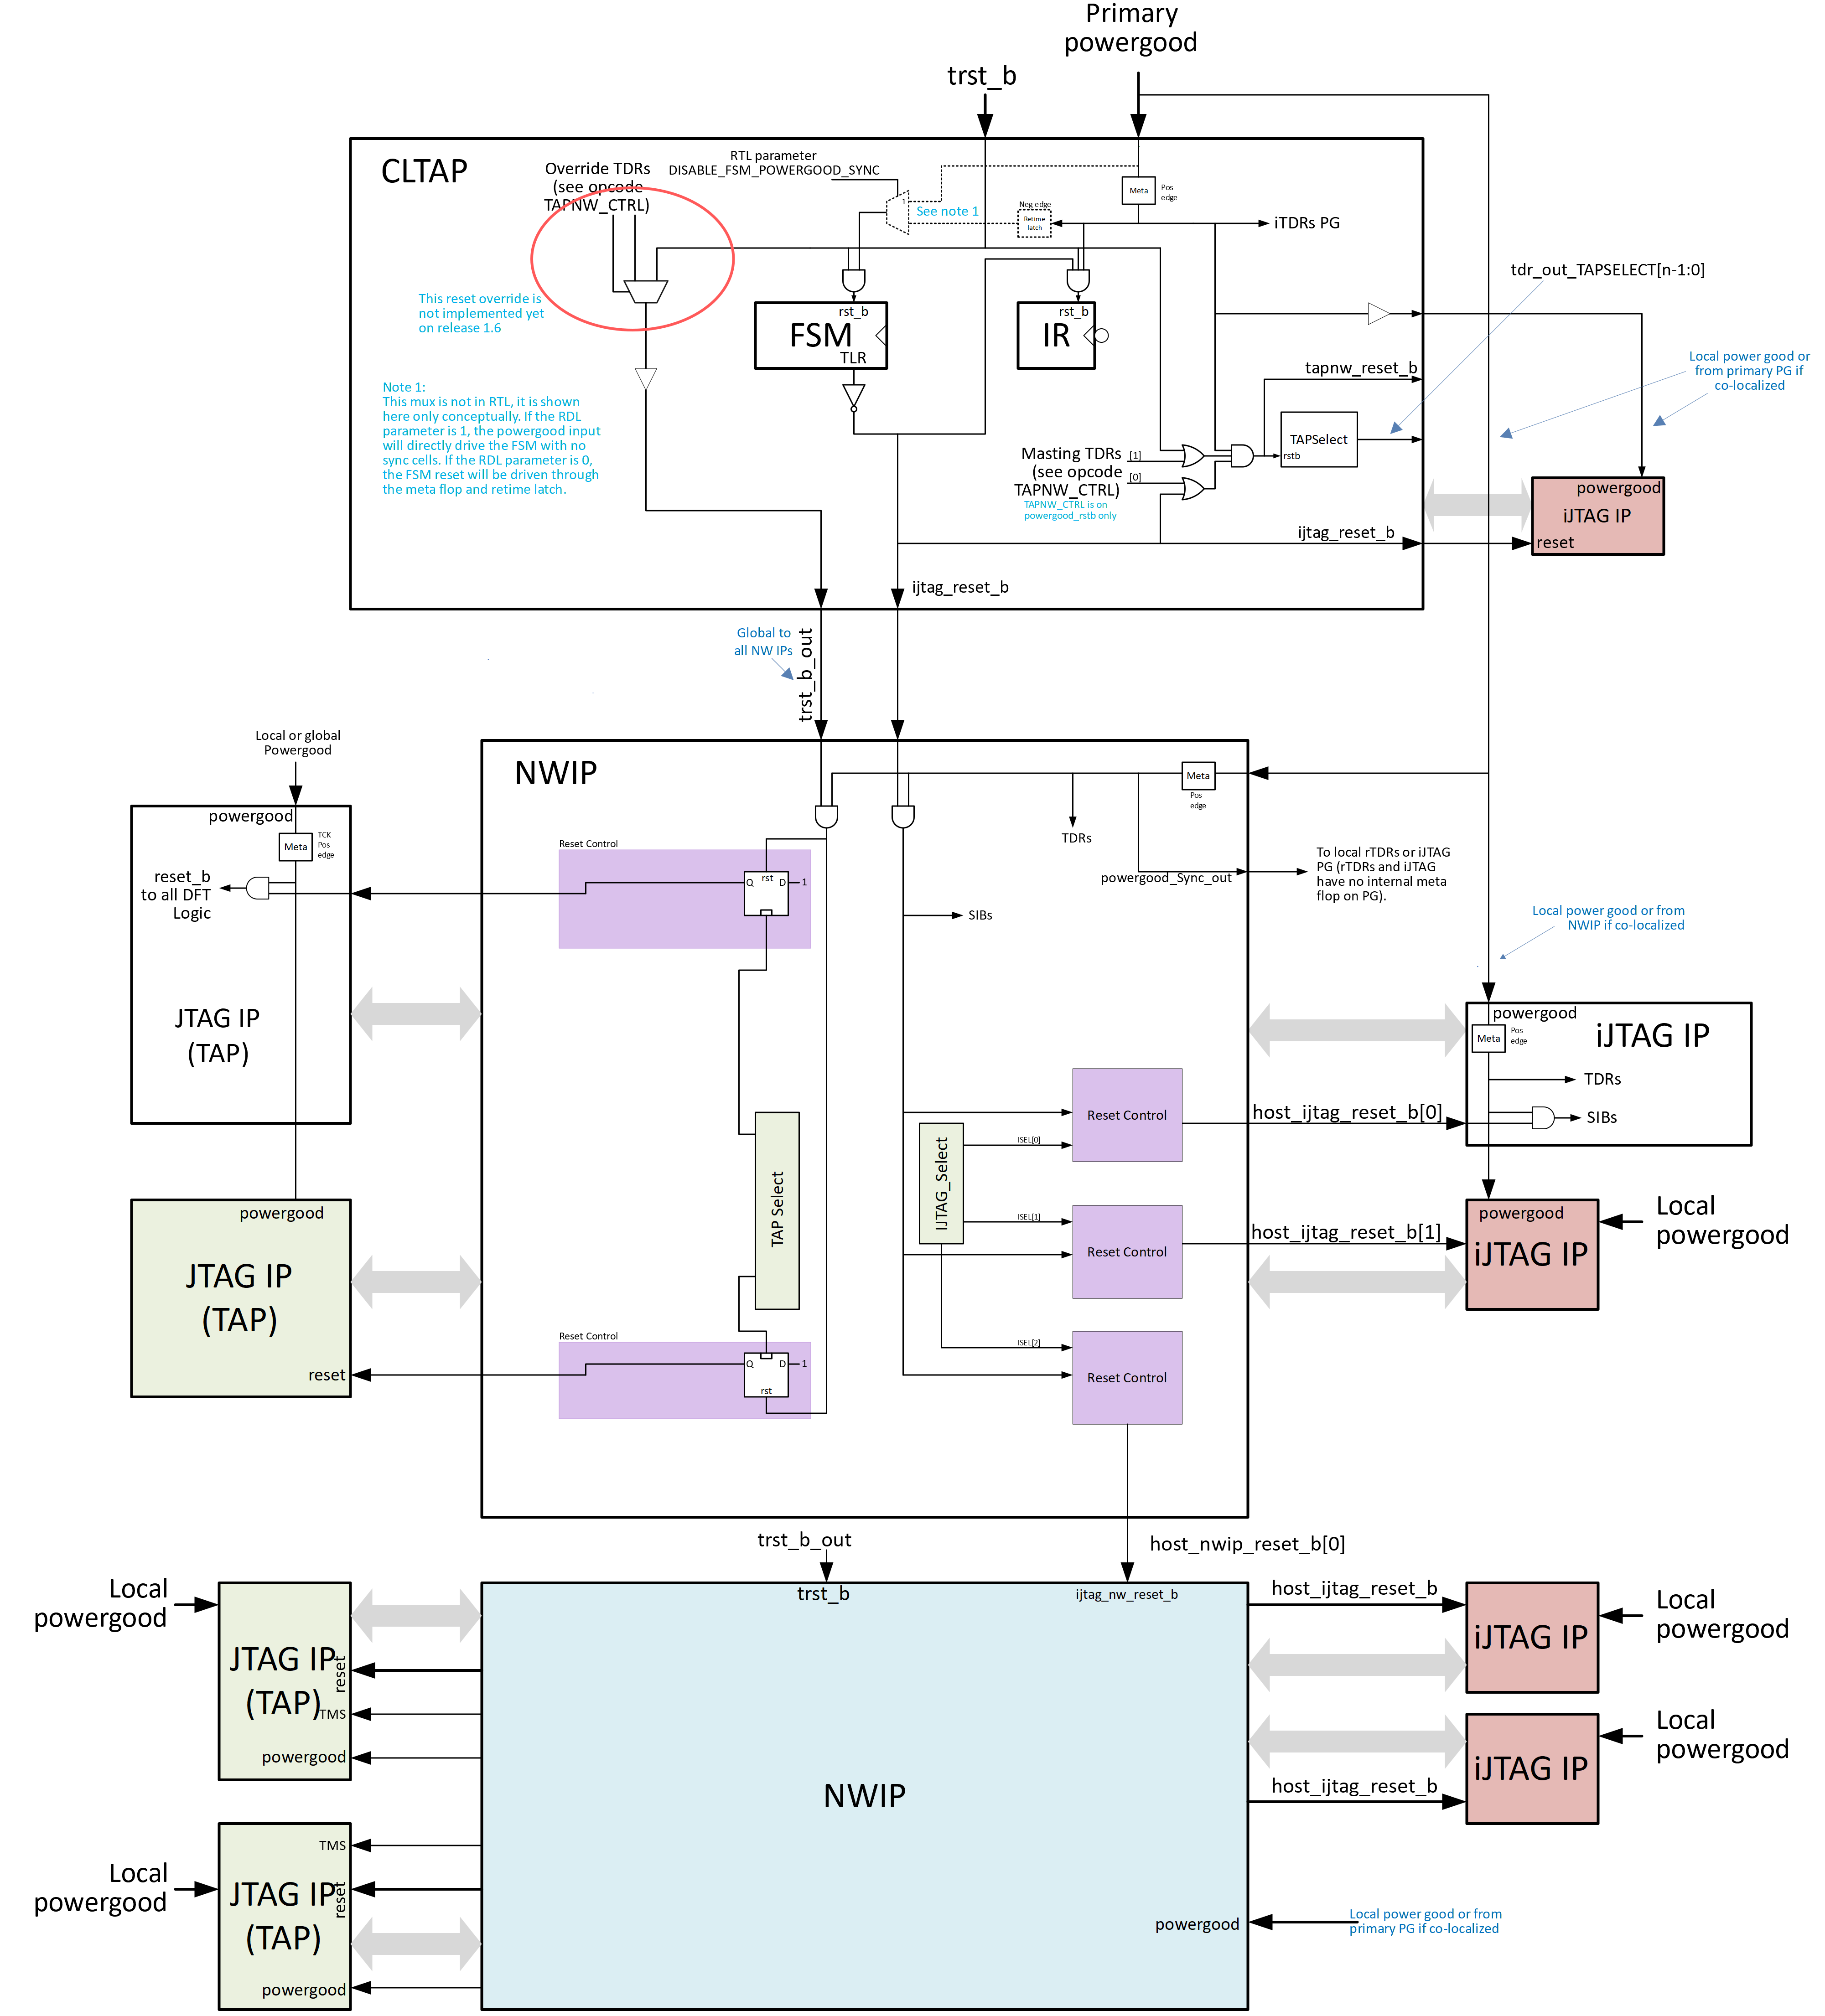

In [12]:
from IPython.display import display
from PIL import Image as PILImage
import io
for png_image in image_paths:
      # Display image in Jupyter notebook
        image = PILImage.open(png_image)
        display(image)

## Saved all summeries in text format

In [13]:
with open("image_summaries.txt", "w") as file:  
    for img_name, summary in image_summaries.items():  
        file.write(f"Image Name: {img_name}\n")  
        file.write(f"Summary: {summary}\n")  
        file.write("***************\n")

## Appending images summeries in the origional document
#### Now the spec only contains text

In [14]:
# Append Summaries to HTML
for img in images:
    img_src = img.get('src')
    img_name = os.path.basename(img_src)[6:]
    if img_name in image_summaries:
        summary = image_summaries[img_name]
        summary_tag = soup.new_tag("p")
        summary_tag.string = summary
        img.replace_with(summary_tag)

## Saved file as modified html

In [15]:
# Save Updated HTML
modified_html_file_path = os.path.join(image_dir, "modified_html.html")
with open(modified_html_file_path, "w", encoding="utf-8") as file:
    file.write(str(soup))

print(f"Modified HTML saved to: {modified_html_file_path}")

Modified HTML saved to: C:\Users\satyaprx\Desktop\INTEL_TESTPLAN2\Extracted_images\modified_html.html


## Read modified html file again for Test plan Description

In [18]:
# Read HTML Document
# Specify the path to the local HTML file
html_file_path = r"C:\\Users\\satyaprx\\Desktop\\INTEL_TESTPLAN2\\modified_html.html"
with open(html_file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')  
text = soup.get_text() 

cleaned_text = ' '.join(text.split())
# cleaned_text

## Making chunks for large files to process

In [19]:
def split_text(text, num_chunks):  
    length = len(text)  
    chunk_size = length // num_chunks  
    return [text[i:i + chunk_size] for i in range(0, length, chunk_size)]  

chunks = split_text(cleaned_text, 7)
# chunks


## Prompt for Test Plan

In [21]:
# Create a prompt for test plan generation  
prompt2= f"""  
Goal:
    You are tasked with Generating clear and Precise plain English text Assertion Descriptions based on the provided semiconductor design Specification Document. 
    The document contains detailed descriptions, tables as text format.
    Your main Objective is to Generate plain English text Assertion Description. 
    
Instructions:
    The assertion description should be concise, clear, and directly related to the design's expected behavior. 
    It should be written in simple, precise language that is easy to understand and directly related to the design's expected behavior.
    The descriptions should be written in simple, precise language that clearly explains the assertions, making them easy to understand and directly related to the design's expected behavior.
    The output should be a list of assertion descriptions in plain English.
    Do not repeat the same assertion description more than once.
    The connection in diagram model has to understandable and clear.

Here are the some examples of Assertion Description:
Example:
    ["To verify the output signal Clamp_sel sets to its default value when trst_b reset is asserted low.",
    "Assert trst_b  as low and then check the ijtag_nw_capture signal  sets to their default value at the same clock cycle.",
    "Assert trst_b  as low and then check the Bypass register field sets to their default value at the same clock cycle.",
    "Assert trst_b  as low and then check the TAPNW_EN register fields sets to their default value at the same clock cycle.",
    "To verify CLTAP FSM - Transition from Test logic reset(TLRS) to Run test Idle(RUTI)
    When in TLRS and tms is low FSM should transit to Run test idle state",
    "When FSM state of CLTAP is in SIRS and tms is high fsm state reg should be in TLRS state",
    "To verify CLTAP BSCAN Signal Status during CLAMP instruction for HIGHZ_select signal
    When fsm_tlr is low, inst_clamp is active and CLAMP instruction is loaded to ir_dec_reg then, check if signal HIGHZ_select is LOW."
    "To verify CLTAP BSCAN Signal Status during CLAMP instruction for bscan_mode signal
    When fsm_tlr is low, inst_clamp is active, sticky_extoggle_en is set HIGH and CLAMP instruction is loaded to ir_dec_reg then, check if signal bscan_mode is HIGH.",
    ....]


Specification Document:
{chunks}
"""

## Generating Testplan Description from Spec

In [22]:
def generate_test_plan(prompt2):  
    messages = [  
        {"role": "system", "content": "You are a test plan generator."},  
        {"role": "user", "content": prompt2}  
    ]  
    response = client.chat.completions.create(  
        model=deployment_name,  
        messages=messages,  
        max_tokens=4000,
        temperature=0.2,
    )
    test_plan_content = response.choices[0].message.content  
    return test_plan_content

In [23]:
full_test_plan = ""  
for i, chunk in enumerate(chunks, start=1):  
    print(f"Processing chunk {i}....")  
    prompt3 = f"{prompt2}\nSpecification Document: {chunk}"  
    part = generate_test_plan(prompt3)
    full_test_plan += part + "\n\n"

print("Test plan generation complete.")  
# print(full_test_plan)
# Save the test plan to a file  
with open('FINAL_TEST_PLAN.txt', 'w') as file:
    file.write(full_test_plan)

Processing chunk 1....
Processing chunk 2....
Processing chunk 3....
Processing chunk 4....
Processing chunk 5....
Processing chunk 6....
Processing chunk 7....
Test plan generation complete.


## Storing Description file as CSV format

In [24]:
import re

# Step 1: Read the text file
with open('FINAL_TEST_PLAN.txt', 'r') as file:
    text = file.read()
items = re.findall(r'^\d+\.\s*(.+)', text, re.MULTILINE)
df = pd.DataFrame(items, columns=['Descriptions'])
df.to_csv('Descriptions.csv', index=False)
print("CSV file created successfully!")


CSV file created successfully!


In [42]:
a=2

In [43]:
# Load the environment variables from .env file
load_dotenv()
deployment_name =os.getenv('DEPLOYMENT_NAME')
endpoint =os.getenv('ENDPOINT')
api_key = os.getenv('API_KEY')
proxy_url = 'http://proxy-us.intel.com:912'  
http_client = httpx.Client(proxy=proxy_url)
client = AzureOpenAI(
    azure_endpoint=endpoint,
    api_key=api_key,
    api_version="2024-02-01",
    http_client=http_client)

In [44]:
import tiktoken
from time import time

In [54]:

# def count_tokens(prompt):     
#     encoding = tiktoken.encoding_for_model("gpt-4") 
#     # Replace with appropriate model if needed
#     tokens = encoding.encode(prompt)   
#     return len(tokens)

In [59]:
import os  
import base64  
from time import time  
  
# Assuming you have a function to count tokens  
def count_tokens(content):  
    # Placeholder for token counting logic  
    return len(content)  
  
def extract_info_from_images(base64_image, prompt):  
    messages = [  
        {  
            "role": "user",  
            "content": [  
                {  
                    "type": "text",  
                    "text": prompt  
                },  
                {  
                    "type": "image_url",  
                    "image_url": {  
                        "url": f"data:image/jpeg;base64,{base64_image}"  
                    }  
                }  
            ]  
        }  
    ]  
    input_token = count_tokens(messages)  
      
    # Assuming you have a client set up for chat completions  
    response = client.chat.completions.create(  
        model='G4',  
        messages=messages,  
        max_tokens=4000  
    )  
      
    image_info = response.choices[0].message.content  
    output_token = count_tokens(response.choices[0].message.content)  
      
    return input_token, output_token  
  
def Summarize_image(image_paths, prompt):  
    images_summary = {}  
    input_tokens = []  
    output_tokens = []  
    summary_time = []  
      
    for image_path in image_paths:  
        img_name = os.path.basename(image_path)  
        with open(image_path, "rb") as image_file:  
            base64_image = base64.b64encode(image_file.read()).decode('utf-8')  
            dt1 = time()  
            input_token, output_token = extract_info_from_images(base64_image, prompt)  
            dt2 = time()  
            input_tokens.append(input_token)  
            output_tokens.append(output_token)  
            summary_time.append(dt2 - dt1)
    return input_tokens, output_tokens, summary_time  
input_tokens, output_tokens, summary_time = Summarize_image(image_paths, prompt)  


In [61]:
print("Input Tokens:", input_tokens)  
print("Output Tokens:", output_tokens)  
print("Summary Time:", summary_time)

Input Tokens: [1, 1]
Output Tokens: [643, 683]
Summary Time: [5.516943454742432, 64.60708475112915]


In [56]:
import os  
import base64  
from time import time

# Assuming you have a function to count tokens  
def count_tokens(content):   
    return len(content)  
  
def extract_info_from_images(base64_image, prompt):  
    messages = [  
        {  
            "role": "user",  
            "content": [  
                {  
                    "type": "text",  
                    "text": prompt  
                },  
                {  
                    "type": "image_url",  
                    "image_url": {  
                        "url": f"data:image/jpeg;base64,{base64_image}"  
                    }  
                }  
            ]  
        }  
    ]  
    input_token = count_tokens(messages)  
      
    # Assuming you have a client set up for chat completions  
    response = client.chat.completions.create(  
        model='G4',  
        messages=messages,  
        max_tokens=4000  
    )  
      
    image_info = response.choices[0].message.content  
    output_token = count_tokens(response.choices[0].message.content)  
      
    return input_token, output_token  
  
def Summarize_image(image_paths, prompt):  
    images_summary = {}  
    input_tokens = []  
    output_tokens = []  
    summary_time = []  
      
    for image_path in image_paths:  
        img_name = os.path.basename(image_path)  
        with open(image_path, "rb") as image_file:  
            base64_image = base64.b64encode(image_file.read()).decode('utf-8')  
            dt1 = time()  
            input_token, output_token = extract_info_from_images(base64_image, prompt)  
            dt2 = time()  
            input_tokens.append(input_token)  
            output_tokens.append(output_token)  
            summary_time.append(dt2 - dt1)  
      
    return input_tokens, output_tokens, summary_time  
  
# Example usage  
image_paths = ["Endebug_Concepts.vsdx_Concept_A_74e3a.png", "cltap_ip.vsdx_Page-1_9ead6.png"]  # Replace with actual image paths  
prompt = "Generate summary of these extracted images."  
input_tokens, output_tokens, summary_time = Summarize_image(image_paths, prompt)  
  
print("Input Tokens:", input_tokens)  
print("Output Tokens:", output_tokens)  
print("Summary Time:", summary_time)  

Input Tokens: [1, 1]
Output Tokens: [739, 931]
Summary Time: [5.780269384384155, 64.29207348823547]


In [74]:
import os  
import base64  
from time import time  
  
# Assuming you have a function to count tokens  
prompt='Generate summeries of the images'
def count_tokens(prompt):     
    encoding = tiktoken.encoding_for_model("gpt-4") 
    # Replace with appropriate model if needed
    tokens = encoding.encode(prompt)   
    return len(tokens)  
  
def extract_info_from_images(base64_image, prompt):  
    messages = [  
        {  
            "role": "user",  
            "content": [  
                {  
                    "type": "text",  
                    "text": prompt  
                },  
                {  
                    "type": "image_url",  
                    "image_url": {  
                        "url": f"data:image/jpeg;base64,{base64_image}"  
                    }  
                }  
            ]  
        }  
    ]  
    # print(type(messages))
    input_token = count_tokens(str(messages))  
      
    # Assuming you have a client set up for chat completions  
    response = client.chat.completions.create(  
        model='G4',  
        messages=messages,  
        max_tokens=4000  
    )  
      
    image_info = response.choices[0].message.content
    if isinstance(image_info, list):
        image_info = " ".join(image_info)  
    output_token = count_tokens(image_info)  
    
    return input_token, output_token  
  
def Summarize_image(image_paths, prompt):  
    # images_summary = {}  
    input_tokens = []  
    output_tokens = []  
    summary_time = []  
      
    for image_path in image_paths:  
        img_name = os.path.basename(image_path)  
        with open(image_path, "rb") as image_file:  
            base64_image = base64.b64encode(image_file.read()).decode('utf-8')  
            dt1 = time()  
            input_token, output_token = extract_info_from_images(base64_image, prompt)  
            dt2 = time()  
            input_tokens.append(input_token)  
            output_tokens.append(output_token)  
            summary_time.append(dt2 - dt1)
    return input_tokens, output_tokens, summary_time  
input_tokens, output_tokens, summary_time = Summarize_image(image_paths, prompt)  


In [76]:
print(input_tokens)
print(output_tokens)
print(summary_time)

[54306, 145885]
[187, 271]
[5.673061370849609, 64.60217642784119]


In [71]:
# import os  
# import base64  
# from time import time  
# # from tiktoken import encoding_for_model  # Uncomment if you are using tiktoken  
# # from openai import OpenAIClient  # Example import, replace with actual client setup  
  
# Initialize the tokenizer  
# encoding = encoding_for_model("gpt-4")  # Replace with actual initialization  
  
def count_tokens(text):  
    # tokens = encoding.encode(text)  # Use your actual tokenizer's encoding method  
    tokens = text.split()  # Simplified token counting  
    return len(tokens)  
  
def extract_info_from_images(base64_image, prompt):  
    messages = [  
        {  
            "role": "user",  
            "content": [  
                {  
                    "type": "text",  
                    "text": prompt  
                },  
                {  
                    "type": "image_url",  
                    "image_url": {  
                        "url": f"data:image/jpeg;base64,{base64_image}"  
                    }  
                }  
            ]  
        }  
    ]  
  
    # Convert prompt to string for token counting  
    input_token = count_tokens(prompt)  
  
    # Assuming you have a client set up for chat completions  
    response = client.chat.completions.create(  
        model='G4',  
        messages=messages,  
        max_tokens=4000,
        temperature=0.2,
        top_p=0.95,
        frequency_penalty=2,
    )  
  
    image_info = response.choices[0].message.content  
    if isinstance(image_info, list):  
        image_info = " ".join(image_info)  
  
    output_token = count_tokens(image_info)  
  
    return input_token, output_token  
  
def Summarize_image(image_paths, prompt):  
    input_tokens = []  
    output_tokens = []  
    summary_time = []  
  
    for image_path in image_paths:  
        img_name = os.path.basename(image_path)  
        with open(image_path, "rb") as image_file:  
            base64_image = base64.b64encode(image_file.read()).decode('utf-8')  
            dt1 = time()  
            input_token, output_token = extract_info_from_images(base64_image, prompt)  
            dt2 = time()  
            input_tokens.append(input_token)  
            output_tokens.append(output_token)  
            summary_time.append(dt2 - dt1)  
  
    return input_tokens, output_tokens, summary_time 
prompt = "Generate summaries of the images"  
input_tokens, output_tokens, summary_time = Summarize_image(image_paths, prompt)  

  
print("Input Tokens:", input_tokens)  
print("Output Tokens:", output_tokens)  
print("Summary Time:", summary_time)  


Input Tokens: [5, 5]
Output Tokens: [124, 78]
Summary Time: [5.975932836532593, 62.457523822784424]
